# Assignmnet 1 FIT5149 - Applied Data Analysis


- Student Name: Ajay Ganapathy
- Student ID: 29822270

Programming Language: R 3.5.1 in Jupyter Notebook


R Libraries used:

- ggplot2
- gridExtra
- reshape2
- psych
- scales
- Ggally
- tibble
- dplyr
- caret
- tidyverse
- broom
- modelr
- glmnet
- leaps
- tidyverse
- Matrix
- xgboost
- readr
- stringr

### Introduction

This assignment covers exploratory data analysis and prediction of the Critical Temperature (Tc) of the superconductors.  <br>
The workflow is as follows:

1. Exploratory Data Analysis (Data Auditing, Feature Scaling using Min-Max Normalization, Feature Selection using Filter Based Methods such as Variance Threshold and Correlation).
2. Model Building using Multiple Linear Regression, Model Updation, Model Comparison and Diagnosis.
3. Model Building using Wrapper Methods such as Stepwise Forward Regression, Stepwise Backward Regression, Stepwise Combined Regression and selecting the best one amongst the three on the basis of Mean Squared Error (MSE).
4. Model Building using Embedded Methods such as Ridge Regression, Lasso Regression and Elastic Net and selecting the best one amongst the three on the basis of Mean Squared Error (MSE).
5. Model Building using XGBoost.
6. Selecting the final best one amongst all (Initial Model, Best Model from Wrapper method, Best Model from Embedded Method and XGBoost Model) on the basis of MSE.

### Installing Required Packages

Here, we install the necessary packages which are required for the implementation in R.

In [ ]:
#install.packages('ggplot2')
#install.packages('reshape2')
#install.packages('psych')
#install.packages('GGally')

#install.packages('tibble')
#install.packages('dplyr')
#install.packages('caret')
#install.packages('tidyverse')
#install.packages('broom')
#install.packages('modelr')

#install.packages('glmnet')
#install.packages('leaps')
#install.packages('tidyverse')
#install.packages('Matrix')
#install.packages('xgboost')
#install.packages('readr')
#install.packages('stringr')
#install.packages('gridExtra')
#install.packages('scales')

### Importing the libraries

Here, we import the required libraries that are needed for the exploratory data analysis, feature selection and model building processes.

In [1]:
#loading the libraries

library(scales)
library(gridExtra)
library(Matrix)
library(xgboost)
library(readr)
library(stringr)
library(car)
library(caret)
library(dplyr)
library(ggplot2)
library(ggplot2)
library(gridExtra)
library(glmnet)
library(reshape2)
library(tidyverse)
library(psych)
library(scales)
library(GGally)
library(tibble)
library(tidyverse)
library(broom)
library(modelr)
library(dplyr)
library(caret)
library(leaps)


Attaching package: 'readr'

The following object is masked from 'package:scales':

    col_factor

Loading required package: carData
Loading required package: lattice
Loading required package: ggplot2

Attaching package: 'dplyr'

The following object is masked from 'package:car':

    recode

The following object is masked from 'package:xgboost':

    slice

The following object is masked from 'package:gridExtra':

    combine

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: foreach
Loaded glmnet 2.0-18

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.1     v purrr   0.3.2
v tidyr   0.8.3     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x purrr::accu

First, we load the dataset and put it in a dataframe to perform some data auditing steps which are shown below.

In [2]:
#reading the dataset
sc_data=read.csv('train.csv',header=TRUE)

#creating a dataframe
sc_df<-data.frame(sc_data)

#displaying initial few rows of the dataframe
head(sc_df)

number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
4,88.94447,57.86269,66.36159,36.11661,1.181795,1.0623955,122.9061,31.79492,51.96883,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.4330127,0.4370588,29
5,92.72921,58.51842,73.13279,36.39660,1.449309,1.0577551,122.9061,36.16194,47.09463,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.6324555,0.4686063,26
4,88.94447,57.88524,66.36159,36.12251,1.181795,0.9759805,122.9061,35.74110,51.96883,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.4330127,0.4446966,19
4,88.94447,57.87397,66.36159,36.11956,1.181795,1.0222909,122.9061,33.76801,51.96883,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.4330127,0.4409521,22
4,88.94447,57.84014,66.36159,36.11072,1.181795,1.1292237,122.9061,27.84874,51.96883,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.4330127,0.4288095,23
4,88.94447,57.79504,66.36159,36.09893,1.181795,1.2252028,122.9061,20.68746,51.96883,...,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.4330127,0.4103259,23


#### Exploratory Data Analysis

Exploratory Data Analysis is the first step towards model building where we start to explore and understand our data.

We perform some data auditing steps such as checking the initial few rows of the dataframe, checking the column names of the dataframe and its type, etc.

In [3]:
#displaying the variables of the dataframe
colnames(sc_df)

[1] "number_of_elements"              "mean_atomic_mass"               
 [3] "wtd_mean_atomic_mass"            "gmean_atomic_mass"              
 [5] "wtd_gmean_atomic_mass"           "entropy_atomic_mass"            
 [7] "wtd_entropy_atomic_mass"         "range_atomic_mass"              
 [9] "wtd_range_atomic_mass"           "std_atomic_mass"                
[11] "wtd_std_atomic_mass"             "mean_fie"                       
[13] "wtd_mean_fie"                    "gmean_fie"                      
[15] "wtd_gmean_fie"                   "entropy_fie"                    
[17] "wtd_entropy_fie"                 "range_fie"                      
[19] "wtd_range_fie"                   "std_fie"                        
[21] "wtd_std_fie"                     "mean_atomic_radius"             
[23] "wtd_mean_atomic_radius"          "gmean_atomic_radius"            
[25] "wtd_gmean_atomic_radius"         "entropy_atomic_radius"          
[27] "wtd_entropy_atomic_radius"       "range_atomic_radius"            
[29] "wtd_range_atomic_radius"         "std_atomic_radius"              
[31] "wtd_std_atomic_radius"           "mean_Density"                   
[33] "wtd_mean_Density"                "gmean_Density"                  
[35] "wtd_gmean_Density"               "entropy_Density"                
[37] "wtd_entropy_Density"             "range_Density"                  
[39] "wtd_range_Density"               "std_Density"                    
[41] "wtd_std_Density"                 "mean_ElectronAffinity"          
[43] "wtd_mean_ElectronAffinity"       "gmean_ElectronAffinity"         
[45] "wtd_gmean_ElectronAffinity"      "entropy_ElectronAffinity"       
[47] "wtd_entropy_ElectronAffinity"    "range_ElectronAffinity"         
[49] "wtd_range_ElectronAffinity"      "std_ElectronAffinity"           
[51] "wtd_std_ElectronAffinity"        "mean_FusionHeat"                
[53] "wtd_mean_FusionHeat"             "gmean_FusionHeat"               
[55] "wtd_gmean_FusionHeat"            "entropy_FusionHeat"             
[57] "wtd_entropy_FusionHeat"          "range_FusionHeat"               
[59] "wtd_range_FusionHeat"            "std_FusionHeat"                 
[61] "wtd_std_FusionHeat"              "mean_ThermalConductivity"       
[63] "wtd_mean_ThermalConductivity"    "gmean_ThermalConductivity"      
[65] "wtd_gmean_ThermalConductivity"   "entropy_ThermalConductivity"    
[67] "wtd_entropy_ThermalConductivity" "range_ThermalConductivity"      
[69] "wtd_range_ThermalConductivity"   "std_ThermalConductivity"        
[71] "wtd_std_ThermalConductivity"     "mean_Valence"                   
[73] "wtd_mean_Valence"                "gmean_Valence"                  
[75] "wtd_gmean_Valence"               "entropy_Valence"                
[77] "wtd_entropy_Valence"             "range_Valence"                  
[79] "wtd_range_Valence"               "std_Valence"                    
[81] "wtd_std_Valence"                 "critical_temp"

In [4]:
#displaying the datatype of the variables 
str(sc_df)

'data.frame':	21263 obs. of  82 variables:
 $ number_of_elements             : int  4 5 4 4 4 4 4 4 4 4 ...
 $ mean_atomic_mass               : num  88.9 92.7 88.9 88.9 88.9 ...
 $ wtd_mean_atomic_mass           : num  57.9 58.5 57.9 57.9 57.8 ...
 $ gmean_atomic_mass              : num  66.4 73.1 66.4 66.4 66.4 ...
 $ wtd_gmean_atomic_mass          : num  36.1 36.4 36.1 36.1 36.1 ...
 $ entropy_atomic_mass            : num  1.18 1.45 1.18 1.18 1.18 ...
 $ wtd_entropy_atomic_mass        : num  1.062 1.058 0.976 1.022 1.129 ...
 $ range_atomic_mass              : num  123 123 123 123 123 ...
 $ wtd_range_atomic_mass          : num  31.8 36.2 35.7 33.8 27.8 ...
 $ std_atomic_mass                : num  52 47.1 52 52 52 ...
 $ wtd_std_atomic_mass            : num  53.6 54 53.7 53.6 53.6 ...
 $ mean_fie                       : num  775 766 775 775 775 ...
 $ wtd_mean_fie                   : num  1010 1011 1011 1011 1010 ...
 $ gmean_fie                      : num  718 721 718 718 718 ...
 $

We can see that all the variables in the dataset are numerical variables. The variable number_of_elements takes on value between 1 to 9 so it is a categorical variable. 

Further, we check if there are any null values in the dataframe. We perform this operation using is.na(df) function.

In [5]:
#displaying the number of null values in each column of the dataframe
colSums(is.na(sc_df))

number_of_elements                mean_atomic_mass 
                              0                               0 
           wtd_mean_atomic_mass               gmean_atomic_mass 
                              0                               0 
          wtd_gmean_atomic_mass             entropy_atomic_mass 
                              0                               0 
        wtd_entropy_atomic_mass               range_atomic_mass 
                              0                               0 
          wtd_range_atomic_mass                 std_atomic_mass 
                              0                               0 
            wtd_std_atomic_mass                        mean_fie 
                              0                               0 
                   wtd_mean_fie                       gmean_fie 
                              0                               0 
                  wtd_gmean_fie                     entropy_fie 
                              0                               0 
                wtd_entropy_fie                       range_fie 
                              0                               0 
                  wtd_range_fie                         std_fie 
                              0                               0 
                    wtd_std_fie              mean_atomic_radius 
                              0                               0 
         wtd_mean_atomic_radius             gmean_atomic_radius 
                              0                               0 
        wtd_gmean_atomic_radius           entropy_atomic_radius 
                              0                               0 
      wtd_entropy_atomic_radius             range_atomic_radius 
                              0                               0 
        wtd_range_atomic_radius               std_atomic_radius 
                              0                               0 
          wtd_std_atomic_radius                    mean_Density 
                              0                               0 
               wtd_mean_Density                   gmean_Density 
                              0                               0 
              wtd_gmean_Density                 entropy_Density 
                              0                               0 
            wtd_entropy_Density                   range_Density 
                              0                               0 
              wtd_range_Density                     std_Density 
                              0                               0 
                wtd_std_Density           mean_ElectronAffinity 
                              0                               0 
      wtd_mean_ElectronAffinity          gmean_ElectronAffinity 
                              0                               0 
     wtd_gmean_ElectronAffinity        entropy_ElectronAffinity 
                              0                               0 
   wtd_entropy_ElectronAffinity          range_ElectronAffinity 
                              0                               0 
     wtd_range_ElectronAffinity            std_ElectronAffinity 
                              0                               0 
       wtd_std_ElectronAffinity                 mean_FusionHeat 
                              0                               0 
            wtd_mean_FusionHeat                gmean_FusionHeat 
                              0                               0 
           wtd_gmean_FusionHeat              entropy_FusionHeat 
                              0                               0 
         wtd_entropy_FusionHeat                range_FusionHeat 
                              0                               0 
           wtd_range_FusionHeat                  std_FusionHeat 
                              0                               0 
             wtd_std_FusionHeat        mean_ThermalConductivity 
                              0                 

Seeing the result, we can conclude that there are no null values in the dataset.

Displaying some descriptive statistics of the dataframe using summary(df) function, we get

In [6]:
#displaying descriptive statistics
summary(sc_df)

 number_of_elements mean_atomic_mass  wtd_mean_atomic_mass gmean_atomic_mass
 Min.   :1.000      Min.   :  6.941   Min.   :  6.423      Min.   :  5.321  
 1st Qu.:3.000      1st Qu.: 72.458   1st Qu.: 52.144      1st Qu.: 58.041  
 Median :4.000      Median : 84.923   Median : 60.697      Median : 66.362  
 Mean   :4.115      Mean   : 87.558   Mean   : 72.988      Mean   : 71.291  
 3rd Qu.:5.000      3rd Qu.:100.404   3rd Qu.: 86.104      3rd Qu.: 78.117  
 Max.   :9.000      Max.   :208.980   Max.   :208.980      Max.   :208.980  
 wtd_gmean_atomic_mass entropy_atomic_mass wtd_entropy_atomic_mass
 Min.   :  1.961       Min.   :0.0000      Min.   :0.0000         
 1st Qu.: 35.249       1st Qu.:0.9667      1st Qu.:0.7754         
 Median : 39.918       Median :1.1995      Median :1.1468         
 Mean   : 58.540       Mean   :1.1656      Mean   :1.0639         
 3rd Qu.: 73.113       3rd Qu.:1.4445      3rd Qu.:1.3594         
 Max.   :208.980       Max.   :1.9838      Max.   :1.9582  

In [7]:
#displaying the dimensions of the dataframe
dim(sc_df)

[1] 21263    82

Now, we start to explore the data through some visulizations to figure out some interesting patterns. We start building correlation heatmaps of features belonging to each property, one at a time.

In [8]:
# Get lower triangle of the correlation matrix
par(mfrow=c(2,2))
get_lower_tri<-function(cormat){
    cormat[upper.tri(cormat)] <- NA
    return(cormat)
}

# Get upper triangle of the correlation matrix
get_upper_tri <- function(cormat)
{
    cormat[lower.tri(cormat)]<- NA
    return(cormat)
}

reorder_cormat <- function(cormat){
# Use correlation between variables as distance
dd <- as.dist((1-cormat)/2)
hc <- hclust(dd)
cormat <-cormat[hc$order, hc$order]
}

get_corr_heatmap<-function(sc_df_group)
{
cormat <- round(cor(sc_df_group),2)
cormat <- reorder_cormat(cormat)
upper_tri <- get_upper_tri(cormat)
melted_cormat <- melt(upper_tri, na.rm = TRUE)
ggheatmap<-ggplot(data = melted_cormat, aes(Var2, Var1, fill = value))+ geom_tile(color = "white")+
             scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                   midpoint = 0, limit = c(-1,1), space = "Lab", 
                   name="Pearson\nCorrelation") +
            theme_minimal()+ 
            theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                    size = 12, hjust = 1))+
            coord_fixed()

final_plot<- ggheatmap + geom_text(aes(Var2, Var1, label = value, fontface=2), color = "black", size = 1.9, fontface='bold') +
                theme(
                      axis.title.x = element_blank(),
                      axis.title.y = element_blank(),
                      panel.grid.major = element_blank(),
                      panel.border = element_blank(),
                      panel.background = element_blank(),
                      axis.ticks = element_blank(),
                      legend.justification = c(1, 0),
                      legend.position = c(0.6, 0.7),
                      legend.direction = "horizontal")+
                      guides(fill = guide_colorbar(barwidth = 7, barheight = 1,
                                    title.position = "top", title.hjust = 0.5))

print(final_plot)   
}

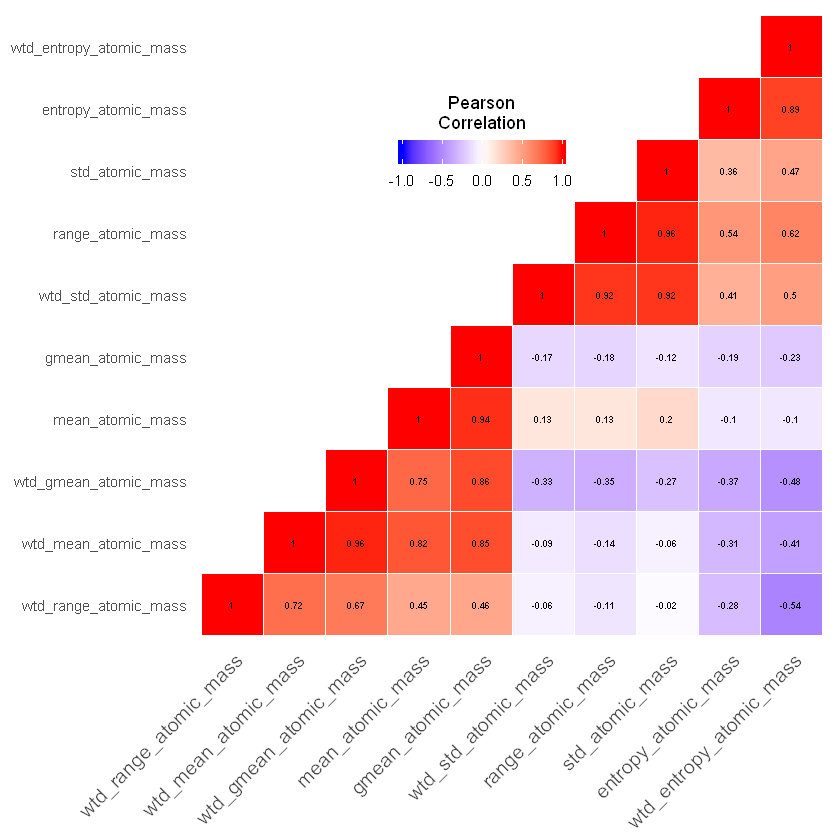

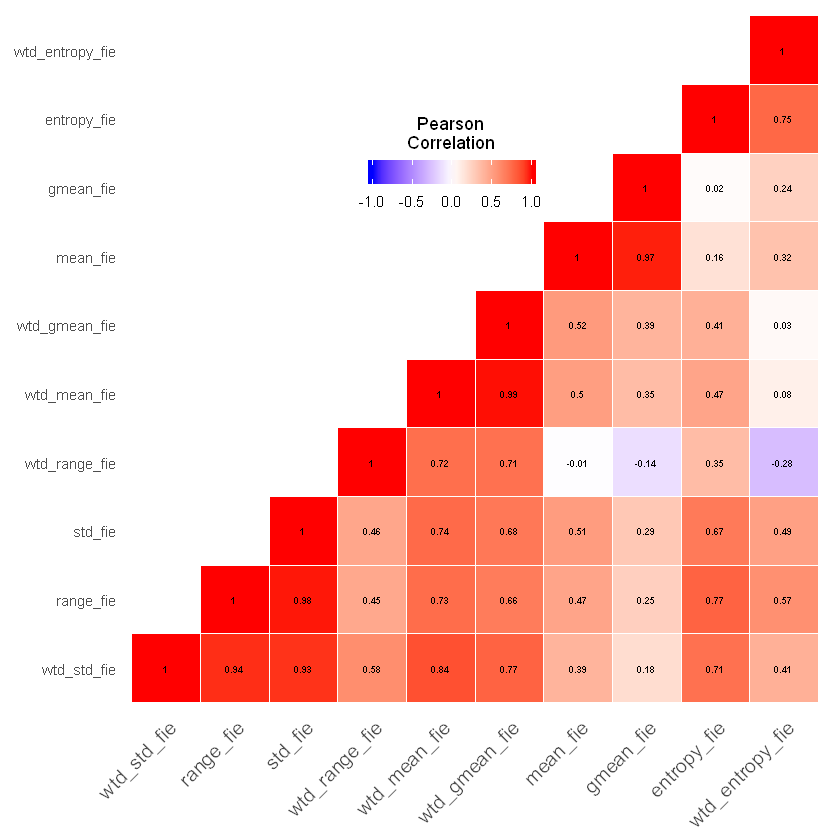

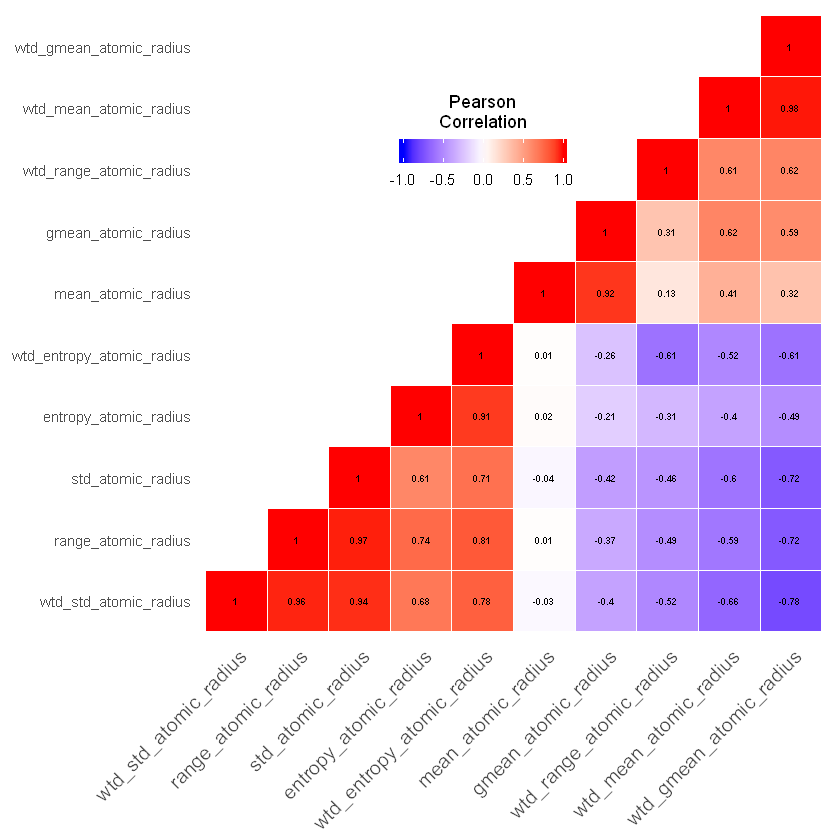

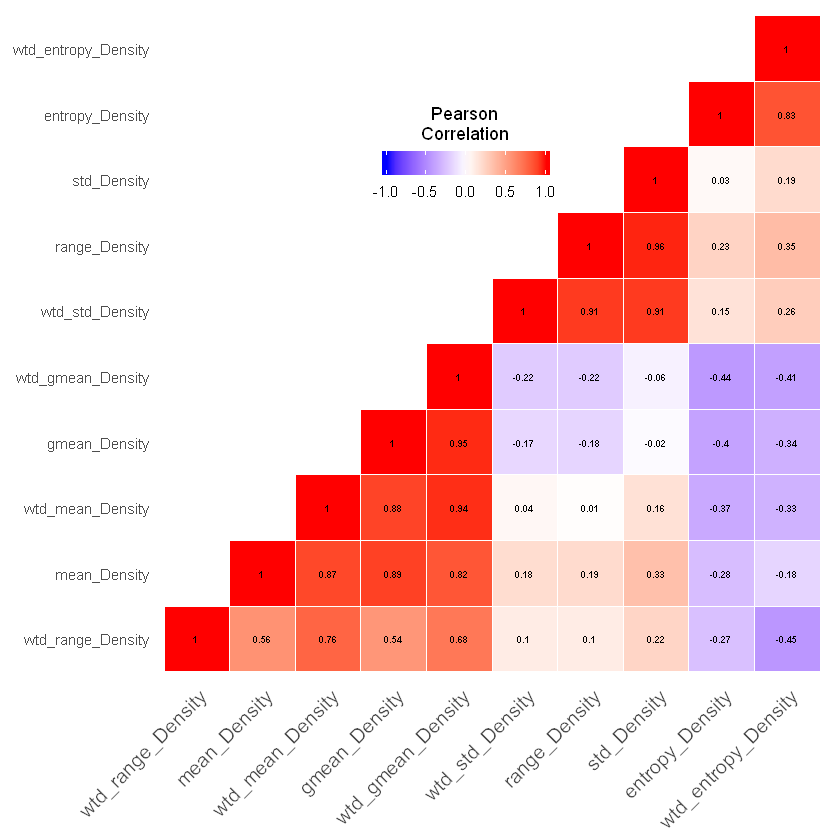

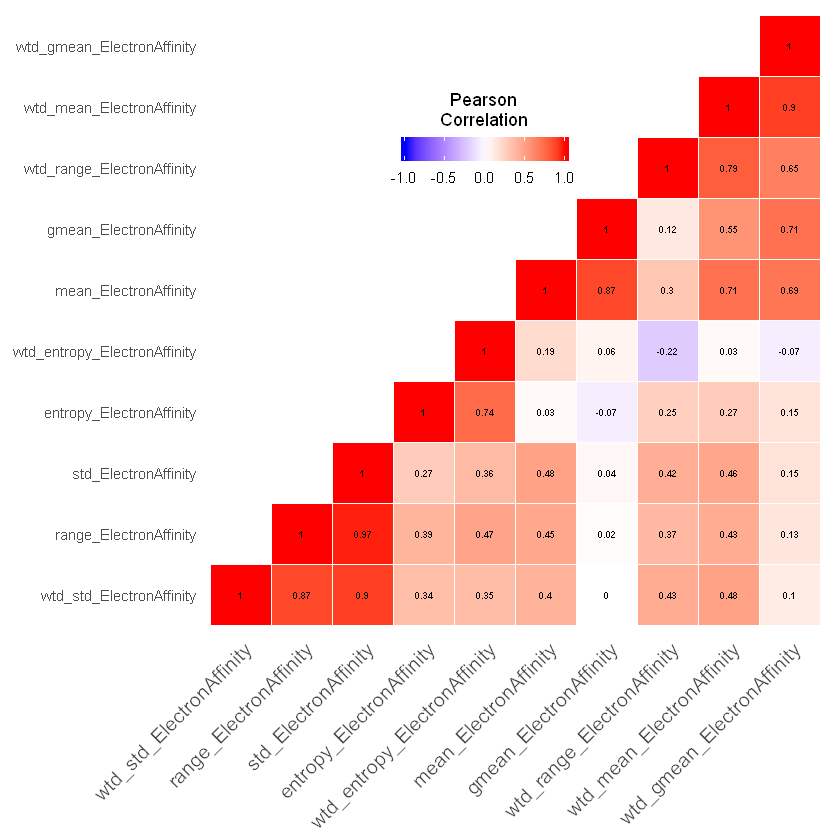

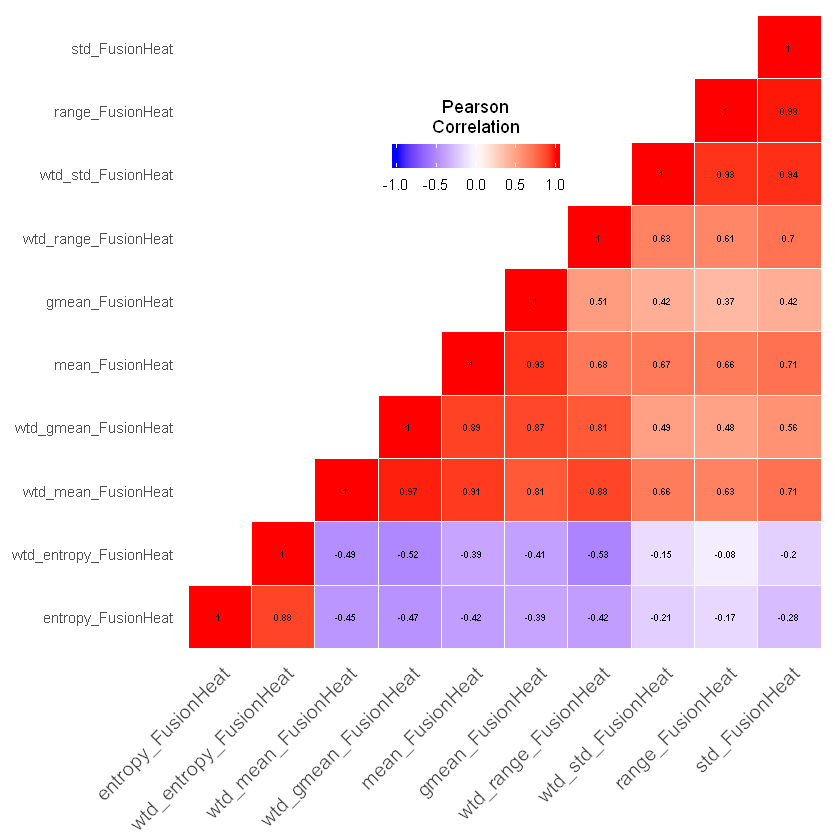

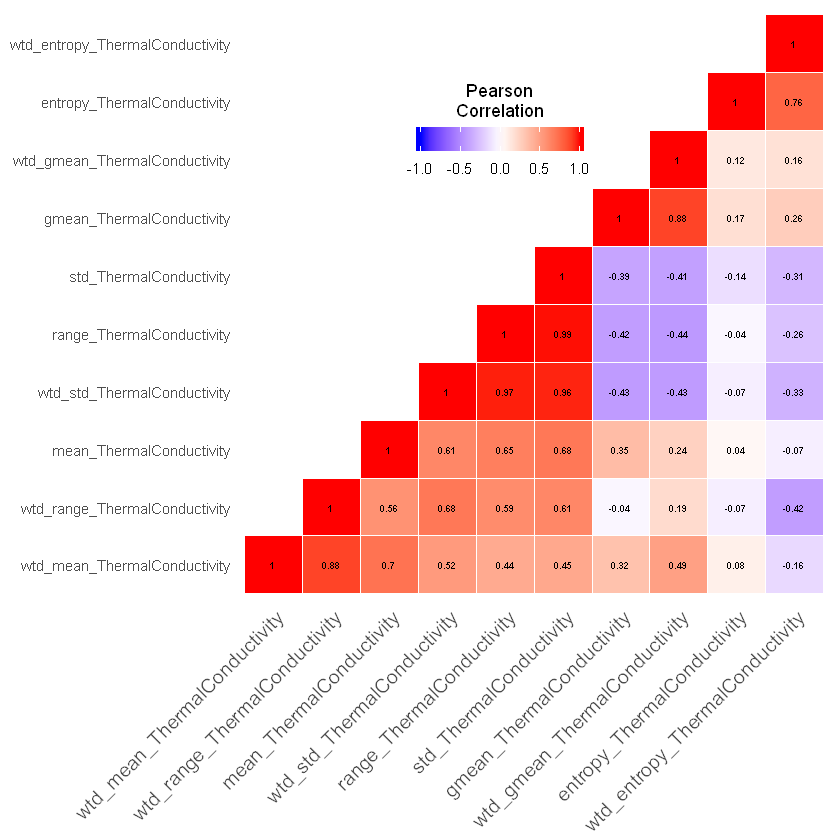

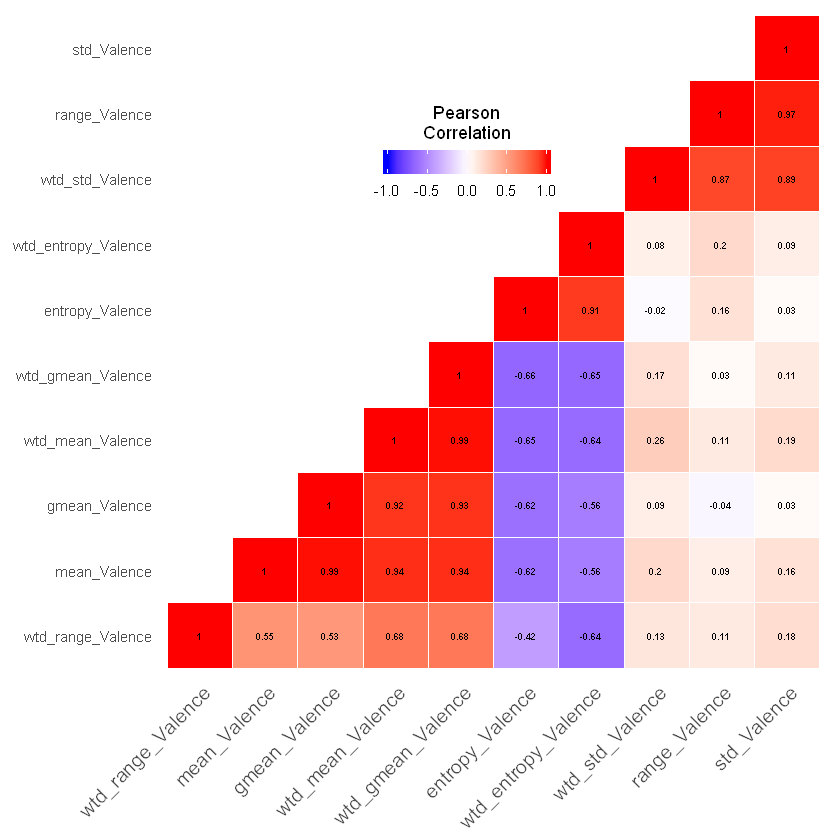

In [9]:
get_corr_heatmap(sc_df[2:11])
get_corr_heatmap(sc_df[12:21])
get_corr_heatmap(sc_df[22:31])
get_corr_heatmap(sc_df[32:41])
get_corr_heatmap(sc_df[42:51])
get_corr_heatmap(sc_df[52:61])
get_corr_heatmap(sc_df[62:71])
get_corr_heatmap(sc_df[72:81])

We can see some interesting patterns in majority of the properties which are as follows : 
* Mean of a feature is highly correlated with Gmean of a feature
* Mean of a feature is highly correlated with Weighted Gmean of a feature
* Weighted Mean of a feature is highly correlated with Weighted Gmean of a feature
* Range of a feature is highly correlated with Standard Deviation of a feature
* Standard deviation of a feature is highly correlated with Weighted Standard deviation of a feature
* Entropy of a feature is highly correlated with Weighted Entropy of a feature

We know that standard deviation is one fourth of the range so their high correlation makes sense. 
We also know that weighted means are calculated by taking into account the individual weights with the element (same/different). Geometric mean is basically derived from mean. So, high correlation between these measures makes sense. 

Further, we view individual variable distributions through histograms. Through histograms, we can comment about the shape of the distribution.

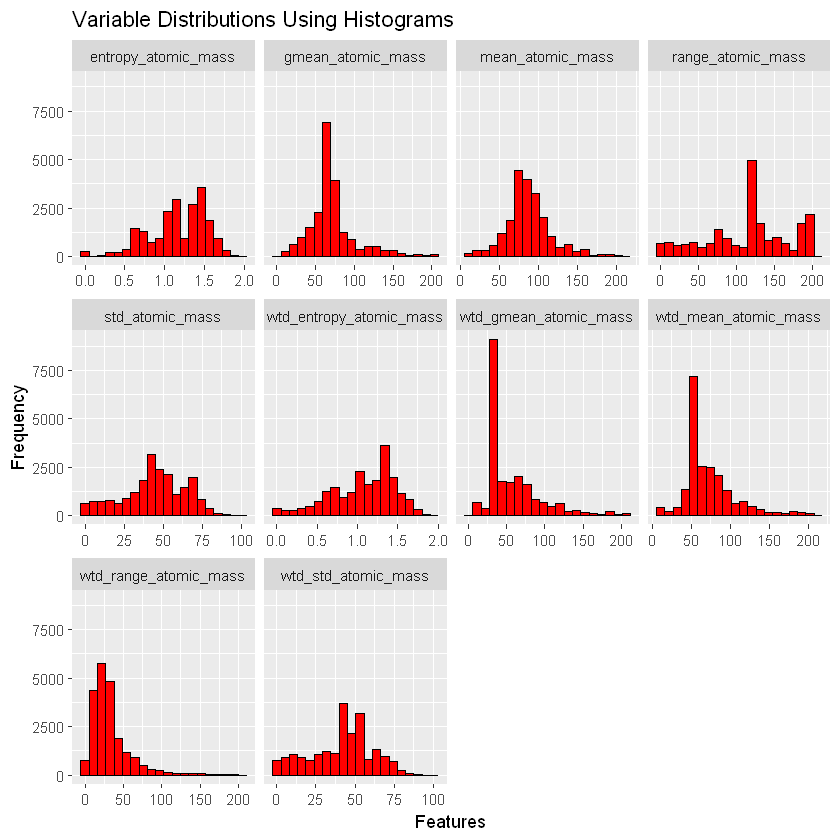

In [10]:
ggplot(gather(sc_df[,c(2:11)]), aes(value)) + 
    geom_histogram(bins = 20,col="black", 
                 fill="red") + 
    facet_wrap(~key, scales = 'free_x')+labs(x='Features',y='Frequency',title='Variable Distributions Using Histograms')

From the above set of plots, we can quickly observe few points 
* The distribution of mean_atomic_mass is close to normal
* wtd_range_atomic_mass and wtd_mean_atomic_mass has a large positve skew
* wtd_std_atomic_mass starts with a uniform distribution but in the middle it forms bimodal
* std_atomic_mass is having a bimodal distribution with two peaks
* wtd_gmean_atomic_mass is having a unimodal distribution with one major peak.



Now, since we know that wtd_range_atomic_mass and wtd_mean_atomic_mass has a large positive skew, we try to counteract the skew by taking a log transformation to achieve a normal distribution.

Warning message:
"Transformation introduced infinite values in continuous x-axis"Warning message:
"Removed 285 rows containing non-finite values (stat_bin)."

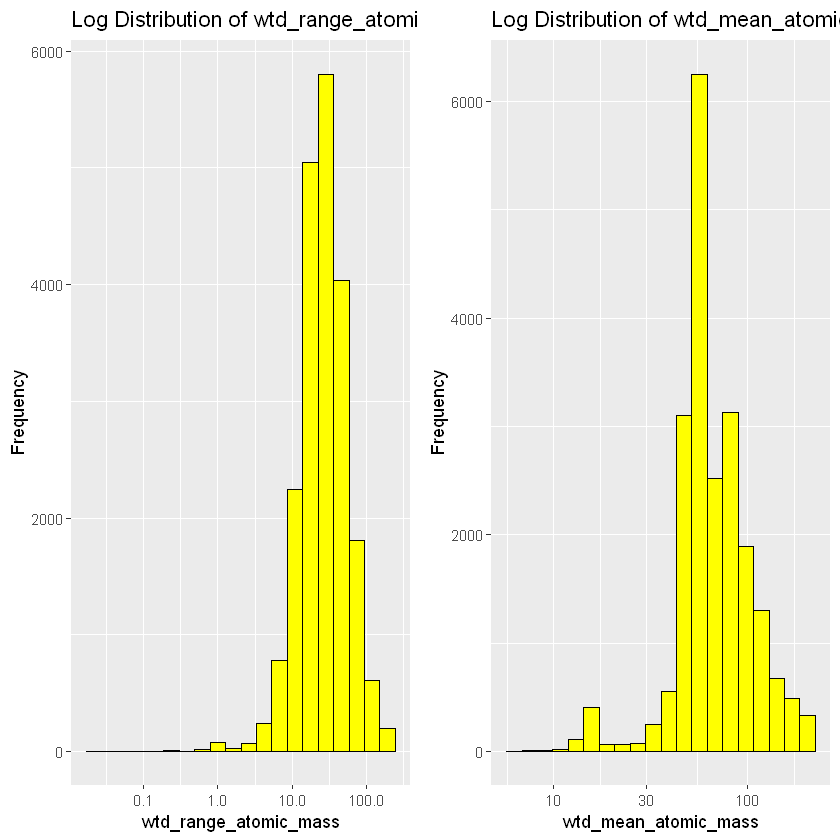

In [11]:
plt1<-ggplot(aes(x=wtd_range_atomic_mass), data=sc_df) +
      geom_histogram(bins=20, colour='black', fill='yellow') +
      scale_x_log10()+labs(x='wtd_range_atomic_mass',y='Frequency',title='Log Distribution of wtd_range_atomic_mass')

plt2<-ggplot(aes(x=wtd_mean_atomic_mass), data=sc_df) +
      geom_histogram(bins=20, colour='black', fill='yellow') +
      scale_x_log10()+labs(x='wtd_mean_atomic_mass',y='Frequency',title='Log Distribution of wtd_mean_atomic_mass')

grid.arrange(plt1,plt2,nrow=1)

We can see that wtd_range_atomic_mass has been perfectly converted to normal using log transformation while wtd_mean_atomic_mass is cose to normal. 

Similarly, we can view the distributions of other features as shown below.

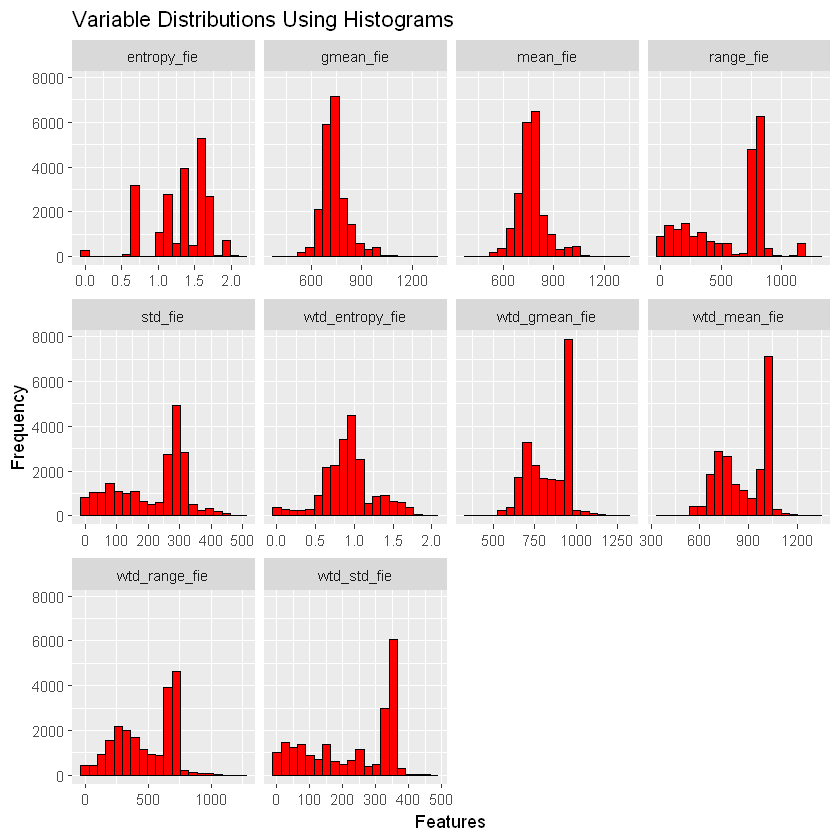

In [12]:
ggplot(gather(sc_df[,c(12:21)]), aes(value)) + 
    geom_histogram(bins = 20,col="black", 
                 fill="red") + 
    facet_wrap(~key, scales = 'free_x')+labs(x='Features',y='Frequency',title='Variable Distributions Using Histograms')

* mean_fie and gmean_fie is having a perfectly normal distribution.
* Features belonging to first energy ionization do not tend to have skewness.

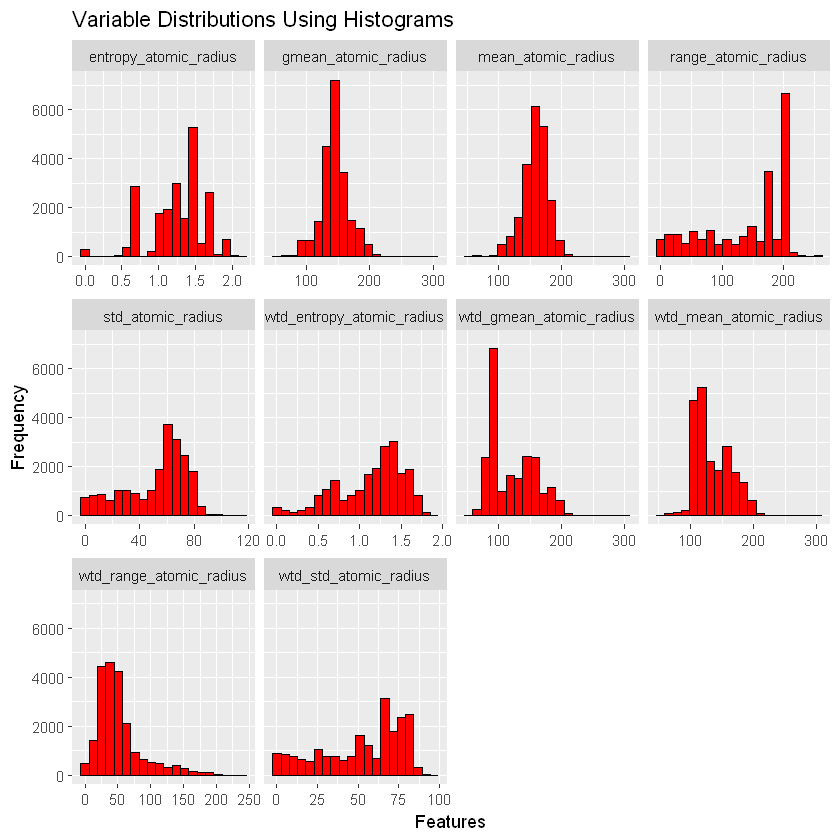

In [13]:
ggplot(gather(sc_df[,c(22:31)]), aes(value)) + 
    geom_histogram(bins = 20,col="black", 
                 fill="red") + 
    facet_wrap(~key, scales = 'free_x')+labs(x='Features',y='Frequency',title='Variable Distributions Using Histograms')

* gmean_atomic_radius and mean_atomic_radius is having a normal distribution. 
* range_atomic_radius has a uniform distribution until 140.
* wtd_range_atomic_radius has a large positive skew.

Transforming wtd_range_atomic_radius to a log scale to counteract the skewness, we get

Warning message:
"Transformation introduced infinite values in continuous x-axis"Warning message:
"Removed 286 rows containing non-finite values (stat_bin)."

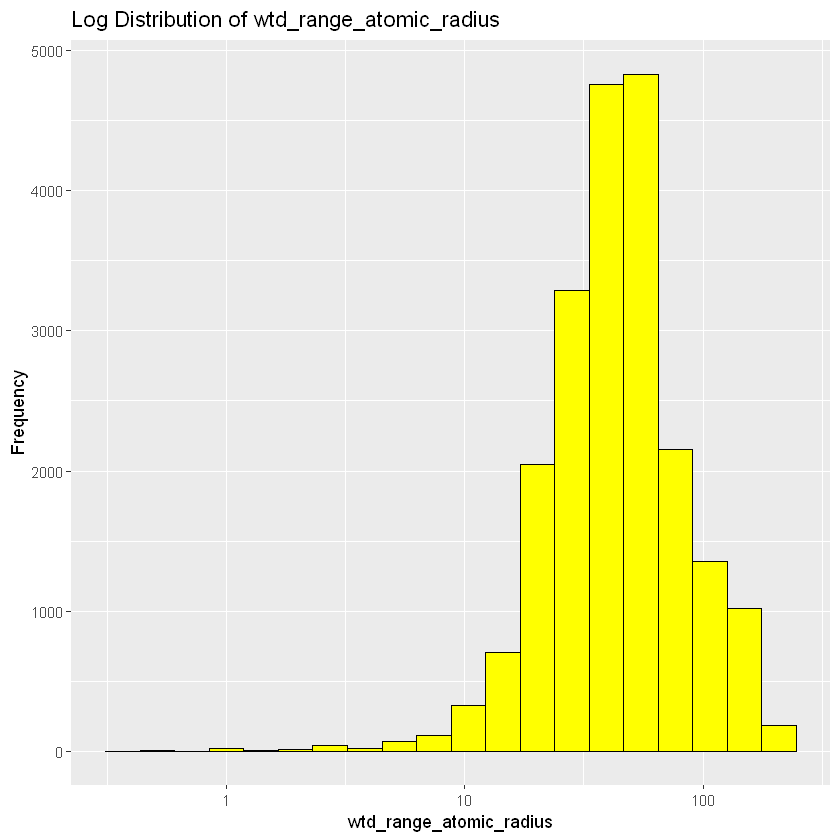

In [14]:
plt1<-ggplot(aes(x=wtd_range_atomic_radius), data=sc_df) +
      geom_histogram(bins=20, colour='black', fill='yellow') +
      scale_x_log10()+labs(x='wtd_range_atomic_radius',y='Frequency',title='Log Distribution of wtd_range_atomic_radius')
plt1

We can see that wtd_range_atomic_radius is now close to normal after log transformation

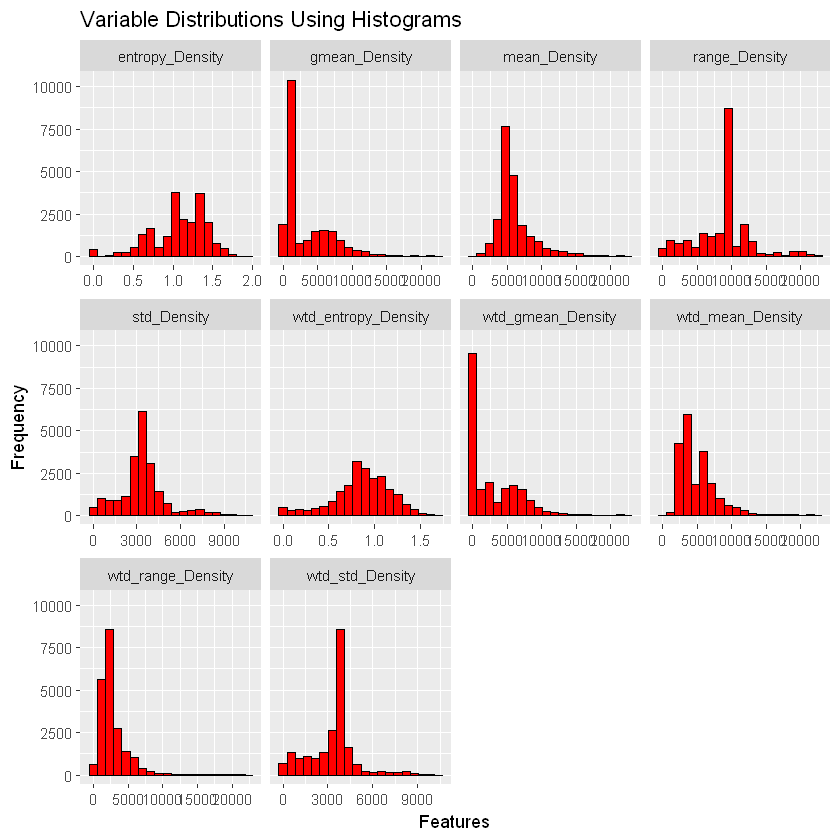

In [15]:
ggplot(gather(sc_df[,c(32:41)]), aes(value)) + 
    geom_histogram(bins = 20,col="black", 
                 fill="red") + 
    facet_wrap(~key, scales = 'free_x')+labs(x='Features',y='Frequency',title='Variable Distributions Using Histograms')

* mean_Density is having a normal distribution.
* entropy_Density has a bimodal distribution with two major peaks.
* wtd_range_Density, wtd_mean_Density has a large positive skew.
* range_Density has a uniform distribution till 1000.


Warning message:
"Transformation introduced infinite values in continuous x-axis"Warning message:
"Removed 287 rows containing non-finite values (stat_bin)."

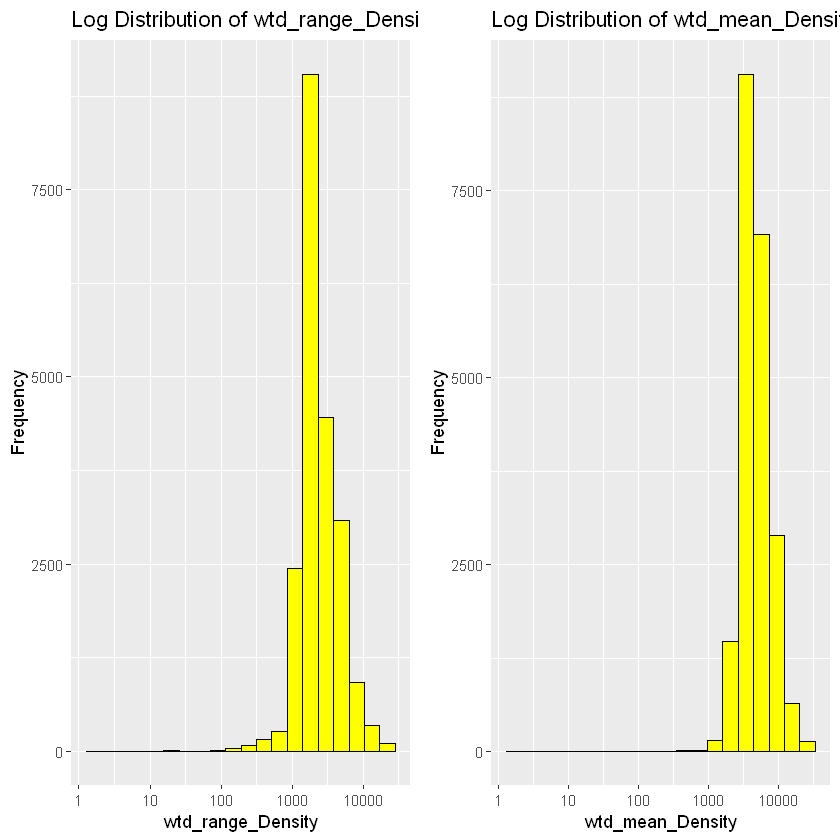

In [16]:
plt1<-ggplot(aes(x=wtd_range_Density), data=sc_df) +
      geom_histogram(bins=20, colour='black', fill='yellow') +
      scale_x_log10()+labs(x='wtd_range_Density',y='Frequency',title='Log Distribution of wtd_range_Density')

plt2<-ggplot(aes(x=wtd_mean_Density), data=sc_df) +
      geom_histogram(bins=20, colour='black', fill='yellow') +
      scale_x_log10()+labs(x='wtd_mean_Density',y='Frequency',title='Log Distribution of wtd_mean_Density')

grid.arrange(plt1,plt2,nrow=1)

Both the features wtd_range_Density and wtd_mean_Density has been converted to a normal distribution using log transformation.

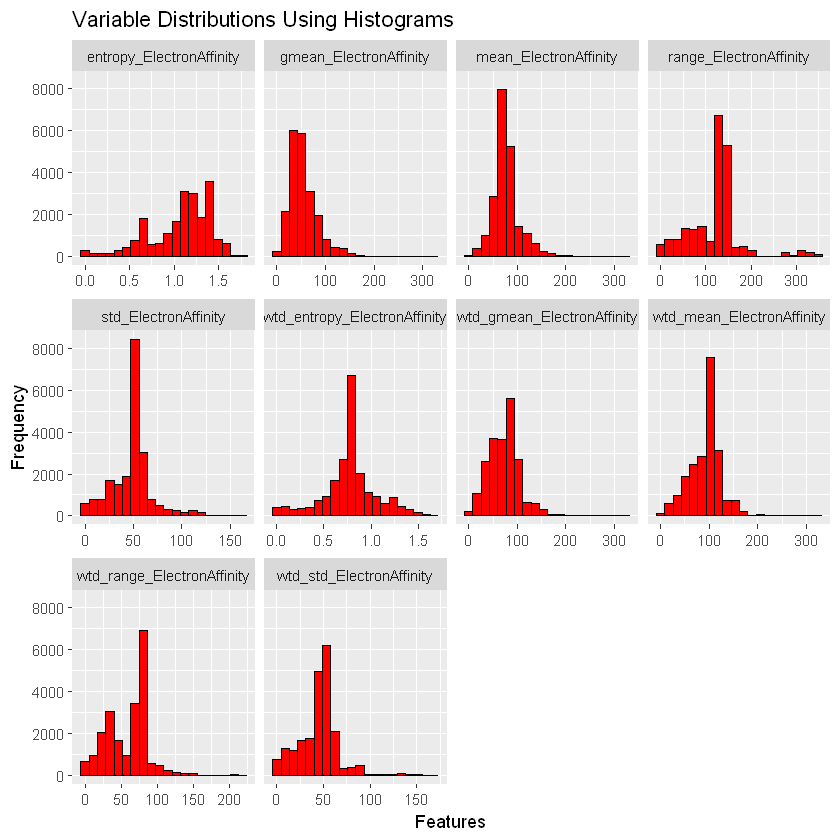

In [17]:
ggplot(gather(sc_df[,c(42:51)]), aes(value)) + 
    geom_histogram(bins = 20,col="black", 
                 fill="red") + 
    facet_wrap(~key, scales = 'free_x')+labs(x='Features',y='Frequency',title='Variable Distributions Using Histograms')

* mean_ElectronAffinity, wtd_entropy_ElectronAffinity has a perfectly normal distribution.
* wtd_mean_ElectronAffinity and std_ElectronAffinity has a unimodal distribution.

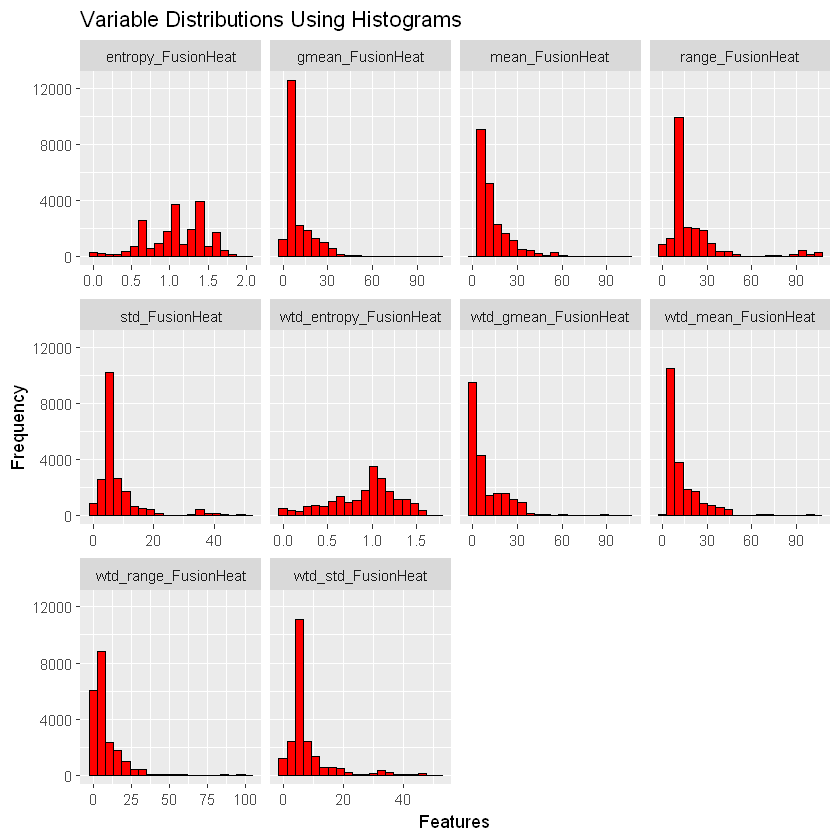

In [18]:
ggplot(gather(sc_df[,c(52:61)]), aes(value)) + 
    geom_histogram(bins = 20,col="black", 
                 fill="red") + 
    facet_wrap(~key, scales = 'free_x')+labs(x='Features',y='Frequency',title='Variable Distributions Using Histograms')

* gmean_FusionHeat, mean_FusionHeat, range_FusionHeat, wtd_mean_FusionHeat, wtd_range_FusionHeat, tend to have positive skews.

Warning message:
"Transformation introduced infinite values in continuous x-axis"Warning message:
"Removed 285 rows containing non-finite values (stat_bin)."Warning message:
"Transformation introduced infinite values in continuous x-axis"Warning message:
"Removed 285 rows containing non-finite values (stat_bin)."

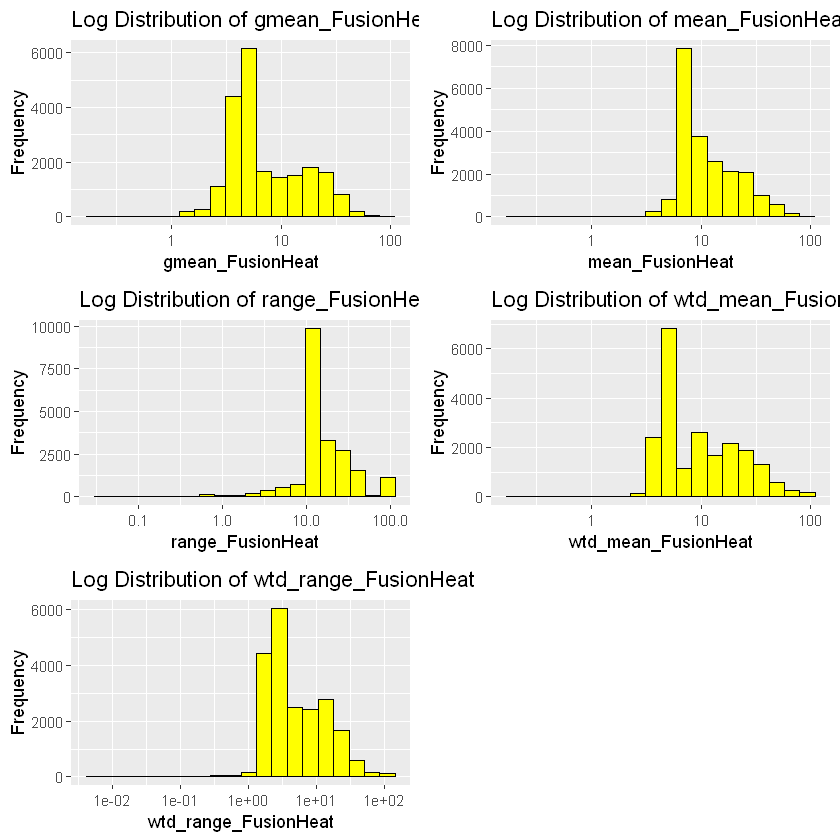

In [19]:
plt1<-ggplot(aes(x=gmean_FusionHeat), data=sc_df) +
      geom_histogram(bins=20, colour='black', fill='yellow') +
      scale_x_log10()+labs(x='gmean_FusionHeat',y='Frequency',title='Log Distribution of gmean_FusionHeat')

plt2<-ggplot(aes(x=mean_FusionHeat), data=sc_df) +
      geom_histogram(bins=20, colour='black', fill='yellow') +
      scale_x_log10()+labs(x='mean_FusionHeat',y='Frequency',title='Log Distribution of mean_FusionHeat')

plt3<-ggplot(aes(x=range_FusionHeat), data=sc_df) +
      geom_histogram(bins=20, colour='black', fill='yellow') +
      scale_x_log10()+labs(x='range_FusionHeat',y='Frequency',title='Log Distribution of range_FusionHeat')

plt4<-ggplot(aes(x=wtd_mean_FusionHeat), data=sc_df) +
      geom_histogram(bins=20, colour='black', fill='yellow') +
      scale_x_log10()+labs(x='wtd_mean_FusionHeat',y='Frequency',title='Log Distribution of wtd_mean_FusionHeat')


plt5<-ggplot(aes(x=wtd_range_FusionHeat), data=sc_df) +
      geom_histogram(bins=20, colour='black', fill='yellow') +
     scale_x_log10()+labs(x='wtd_range_FusionHeat',y='Frequency',title='Log Distribution of wtd_range_FusionHeat')


grid.arrange(plt1,plt2,plt3,plt4,plt5,nrow=3)


The log transformations didnt give us a normal distribution in this case.

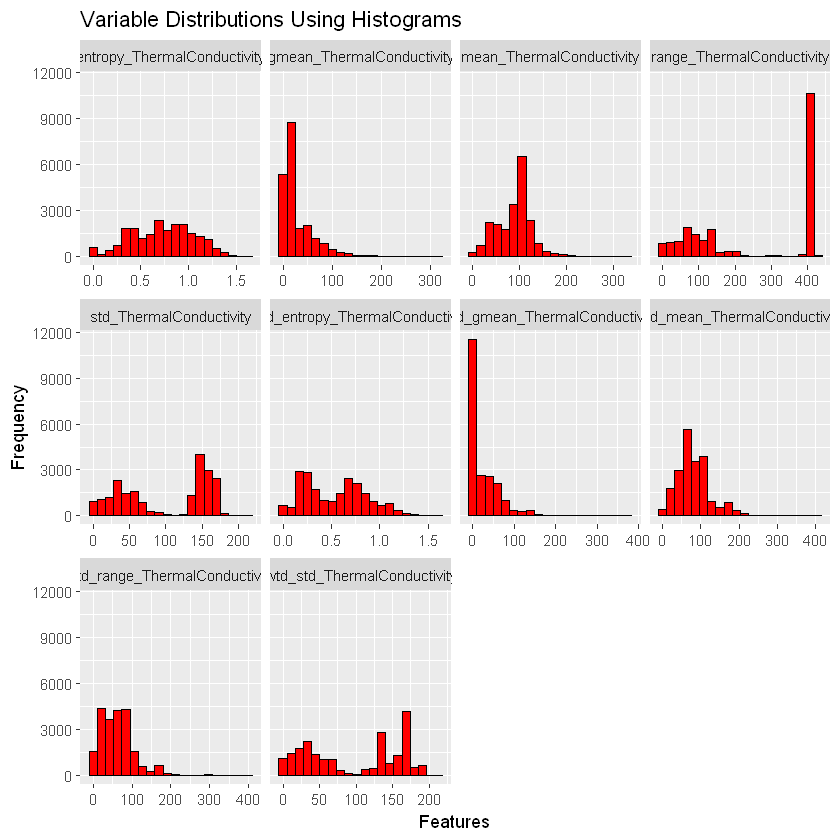

In [20]:
ggplot(gather(sc_df[,c(62:71)]), aes(value)) + 
    geom_histogram(bins = 20,col="black", 
                 fill="red") + 
    facet_wrap(~key, scales = 'free_x')+labs(x='Features',y='Frequency',title='Variable Distributions Using Histograms')

* std_ThermalConductivity and wtd_entropy_ThermalConductivity has a bimodal distribution.

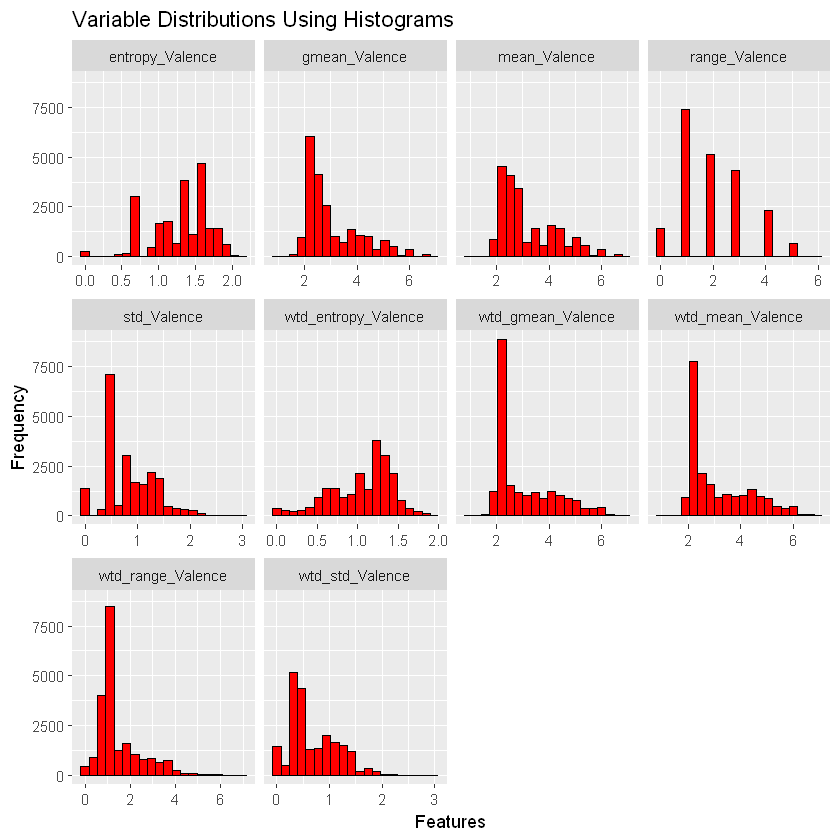

In [21]:
ggplot(gather(sc_df[,c(72:81)]), aes(value)) + 
    geom_histogram(bins = 20,col="black", 
                 fill="red") + 
    facet_wrap(~key, scales = 'free_x')+labs(x='Features',y='Frequency',title='Variable Distributions Using Histograms')

* wtd_entropy_Valence has a negative skew. 
* wtd_gmean_Valence, wtd_range_Valence and wtd_mean_Valence has a unimodal distribution

We further explore the distribution of number_of_elements and target i.e. critical_temp

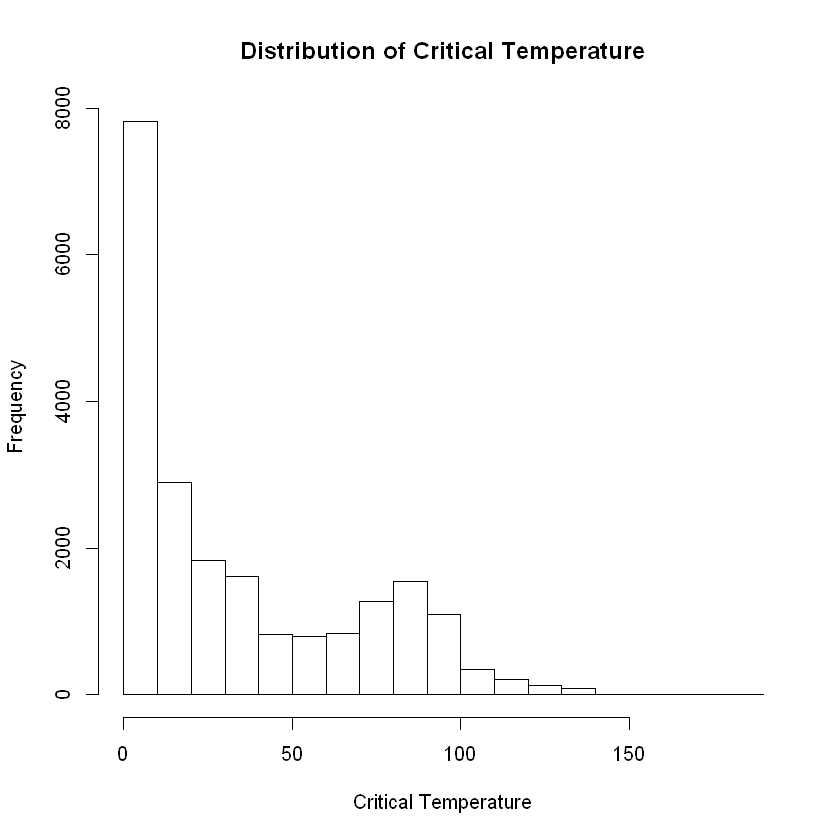

In [22]:
hist(sc_df$critical_temp,xlab='Critical Temperature',ylab='Frequency',main='Distribution of Critical Temperature') 

From the above histogram, we can see that majority of elements have critical temperature between 0-10.

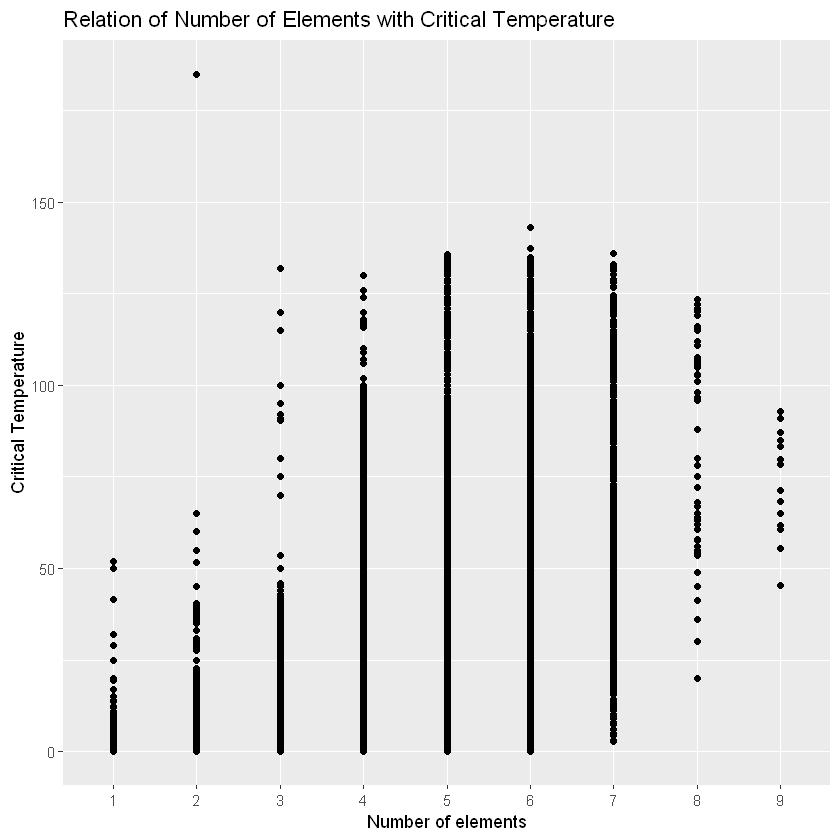

In [23]:
ggplot(data=sc_df,aes(x=as.factor(number_of_elements),y=critical_temp))+geom_point()+labs(x='Number of elements',y='Critical Temperature',title='Relation of Number of Elements with Critical Temperature')

From the above plot, it is clear that as the number of elements increases, the critical temperature also increases.

In [24]:
sc_df$number_of_elements<-as.factor(sc_df$number_of_elements)

In [25]:
m1<-melted_house_df<-melt(sc_df[,1:11])
head(m1)

Using number_of_elements as id variables


number_of_elements,variable,value
4,mean_atomic_mass,88.94447
5,mean_atomic_mass,92.72921
4,mean_atomic_mass,88.94447
4,mean_atomic_mass,88.94447
4,mean_atomic_mass,88.94447
4,mean_atomic_mass,88.94447


Exploring how number of elements is related to other features of the property atomic mass,

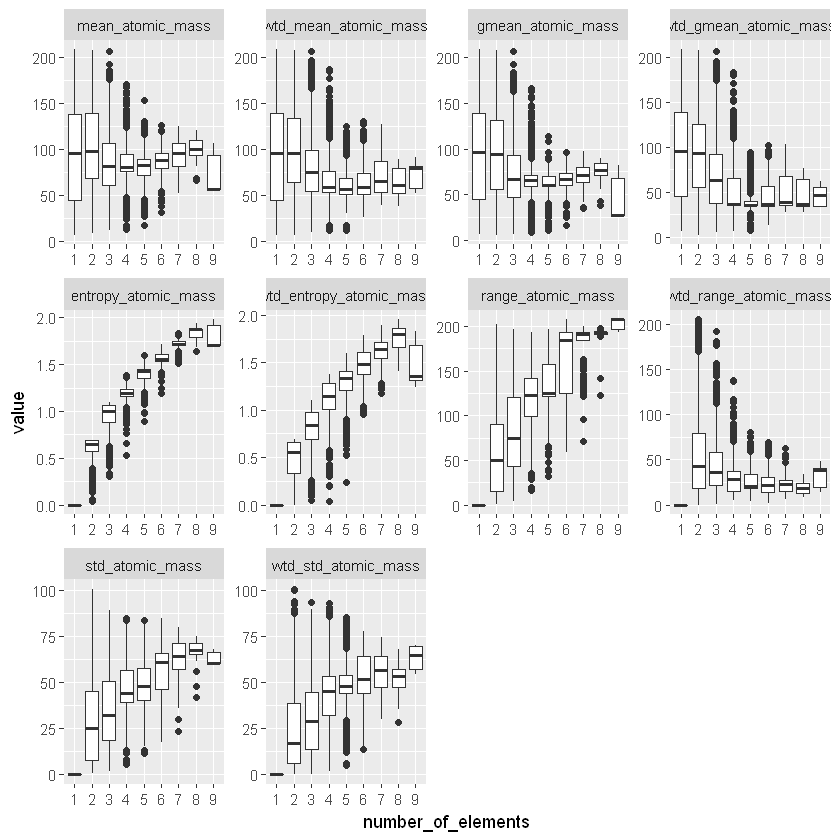

In [26]:
ggplot(m1,aes(x = number_of_elements,y = value)) +
facet_wrap(~variable, scales="free") +
geom_boxplot() +
scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

From the above plot, we can see that as the number of elements increases, mean atomic mass, wtd mean atomic mass, gmean atomic mass, wtd gmean atomic mass, wtd range atomic mass decreases and 
entropy atomic mass, wtd entropy atomic mass, range atomic mass increases.

In [27]:
m1<-melted_sc_df<-melt(sc_df[,c(1,12:21)])
head(m1)

Using number_of_elements as id variables


number_of_elements,variable,value
4,mean_fie,775.425
5,mean_fie,766.440
4,mean_fie,775.425
4,mean_fie,775.425
4,mean_fie,775.425
4,mean_fie,775.425


Exploring how number of elements is related to other features of the property Feature Ionization Energy

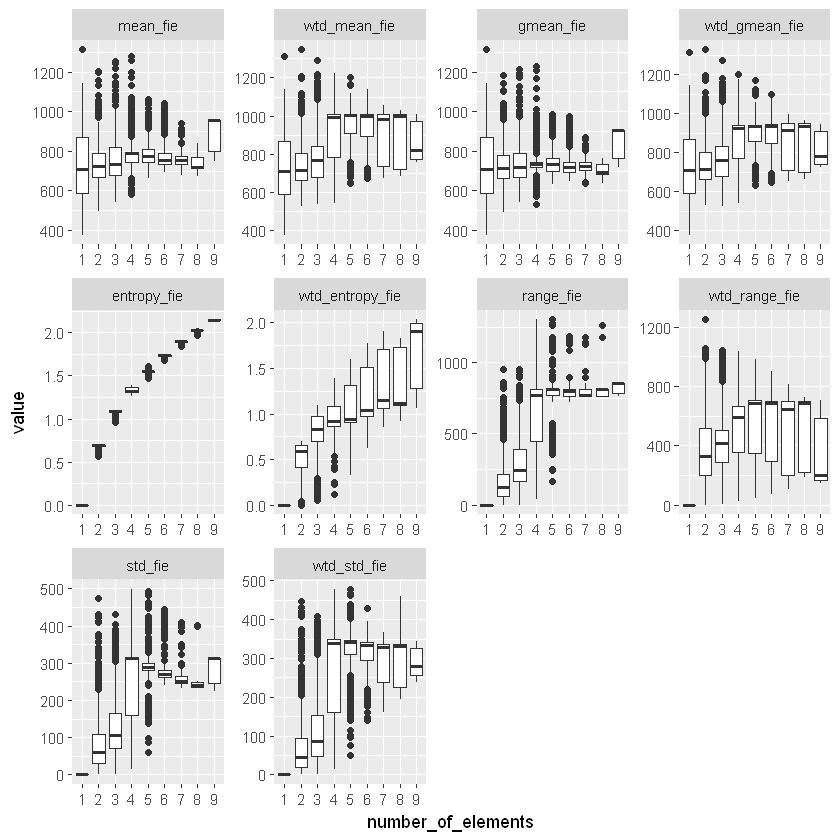

In [28]:
ggplot(m1,aes(x = number_of_elements,y = value)) +
facet_wrap(~variable, scales="free") +
geom_boxplot() +
scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

We can see that as the number of elements increases, entropy fie and wtd entropy fie increases.

##### Feature Scaling using Min-Max Normalization

From the above descriptive statistics, we can see that the ranges vary a lot for different columns. We need to bring the data in one common scale. So, we use <b> Min-Max Normalization </b> to bring them under one scale.

In [29]:
#Min-Max Normalization
normalize <- function(x) 
{
    return ((x - min(x)) / (max(x) - min(x)))
}

In [30]:
sc_df$number_of_elements<-as.numeric(sc_df$number_of_elements)

In [31]:
#Normalizing entire predictors
sc_df_scaled <- as.data.frame(lapply(sc_df[1:81], normalize))
head(sc_df_scaled)

number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0.375,0.4058786,0.2539495,0.2997205,0.1649881,0.5957238,0.5425359,0.5909728,0.1546521,0.5144425,...,0.2083333,0.2095238,0.2022273,0.2032972,0.639097,0.5468533,0.1666667,0.1552751,0.1443376,0.1456863
0.500,0.4246113,0.2571868,0.3329680,0.1663406,0.7305732,0.5401661,0.5909728,0.1758935,0.4661926,...,0.1666667,0.2095238,0.1480292,0.2017799,0.726956,0.5371086,0.3333333,0.1614043,0.2108185,0.1562021
0.375,0.4058786,0.2540608,0.2997205,0.1650166,0.5957238,0.4984061,0.5909728,0.1738466,0.5144425,...,0.2083333,0.2119048,0.2022273,0.2054464,0.639097,0.5278526,0.1666667,0.1593612,0.1443376,0.1482322
0.375,0.4058786,0.2540052,0.2997205,0.1650023,0.5957238,0.5220555,0.5909728,0.1642494,0.5144425,...,0.2083333,0.2107143,0.2022273,0.2043703,0.639097,0.5379358,0.1666667,0.1573182,0.1443376,0.1469840
0.375,0.4058786,0.2538382,0.2997205,0.1649596,0.5957238,0.5766632,0.5909728,0.1354577,0.5144425,...,0.2083333,0.2071429,0.2022273,0.2011605,0.639097,0.5621533,0.1666667,0.1511889,0.1443376,0.1429365
0.375,0.4058786,0.2536155,0.2997205,0.1649027,0.5957238,0.6256770,0.5909728,0.1006249,0.5144425,...,0.2083333,0.2023810,0.2022273,0.1969239,0.639097,0.5854497,0.1666667,0.1430165,0.1443376,0.1367753


We can see that the predictors have been brought in one scale using min-max normalization.

In [32]:
#extracting target
sc_df[-82]<-NULL
head(sc_df)

critical_temp
29
26
19
22
23
23


In [33]:
#combining scaled predictors and target
sc_df1<-cbind(sc_df_scaled,sc_df)
head(sc_df1)

number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0.375,0.4058786,0.2539495,0.2997205,0.1649881,0.5957238,0.5425359,0.5909728,0.1546521,0.5144425,...,0.2095238,0.2022273,0.2032972,0.639097,0.5468533,0.1666667,0.1552751,0.1443376,0.1456863,29
0.500,0.4246113,0.2571868,0.3329680,0.1663406,0.7305732,0.5401661,0.5909728,0.1758935,0.4661926,...,0.2095238,0.1480292,0.2017799,0.726956,0.5371086,0.3333333,0.1614043,0.2108185,0.1562021,26
0.375,0.4058786,0.2540608,0.2997205,0.1650166,0.5957238,0.4984061,0.5909728,0.1738466,0.5144425,...,0.2119048,0.2022273,0.2054464,0.639097,0.5278526,0.1666667,0.1593612,0.1443376,0.1482322,19
0.375,0.4058786,0.2540052,0.2997205,0.1650023,0.5957238,0.5220555,0.5909728,0.1642494,0.5144425,...,0.2107143,0.2022273,0.2043703,0.639097,0.5379358,0.1666667,0.1573182,0.1443376,0.1469840,22
0.375,0.4058786,0.2538382,0.2997205,0.1649596,0.5957238,0.5766632,0.5909728,0.1354577,0.5144425,...,0.2071429,0.2022273,0.2011605,0.639097,0.5621533,0.1666667,0.1511889,0.1443376,0.1429365,23
0.375,0.4058786,0.2536155,0.2997205,0.1649027,0.5957238,0.6256770,0.5909728,0.1006249,0.5144425,...,0.2023810,0.2022273,0.1969239,0.639097,0.5854497,0.1666667,0.1430165,0.1443376,0.1367753,23


##### Feature Selection using Variance Threshold and Correlation

We further proceed with a filter based feature selection method named <B> Variance Threshold </B>. Basically, we calculate the variance of all the features to figure out those features that have a very low variance. Features having variance close to 0 or 0 do not add any significant value in the model. So, we discard those features.

Extracting the variance of all the features we get,

In [34]:
#Retrieving variance of all the features
sc_df1_var<-data.frame(sort(apply(sc_df1[1:81], 2, var)))

sc_df1_var<- sc_df1_var %>% rownames_to_column("Features")

names(sc_df1_var)[2]<-'Variance'

dim(sc_df1_var)

[1] 81  2

In [35]:
sc_df1_var

Features,Variance
mean_atomic_radius,0.006494612
gmean_fie,0.006978962
mean_ElectronAffinity,0.007283192
gmean_atomic_radius,0.007808167
gmean_ElectronAffinity,0.007985853
mean_fie,0.008707003
gmean_FusionHeat,0.009229221
wtd_gmean_ElectronAffinity,0.009506216
wtd_mean_ElectronAffinity,0.009887188
wtd_gmean_ThermalConductivity,0.011425159


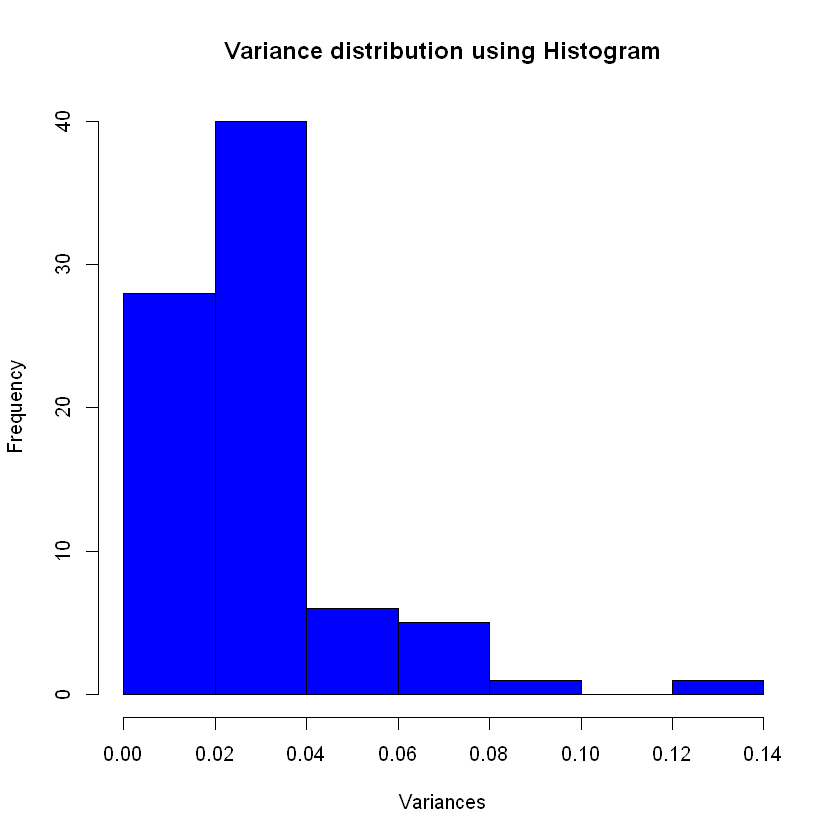

In [36]:
hist(sc_df1_var$Variance,xlab='Variances',main='Variance distribution using Histogram',col='blue')

We can see that features such as mean_atomic_radius, gmean_fie, etc. have variance such as 0.006. We need to discard these low variance features. By setting a threshold value of 0.025, we filter out those features from the main dataframe.

From the above plot, we can see that nearly 25-30 features are having variance less than 0.02 which we need to discard. 

In [37]:
#filtering those features that have variance less than 0.025
sc_df1_var[sc_df1_var$Variance<0.025,]

Features,Variance
mean_atomic_radius,0.006494612
gmean_fie,0.006978962
mean_ElectronAffinity,0.007283192
gmean_atomic_radius,0.007808167
gmean_ElectronAffinity,0.007985853
mean_fie,0.008707003
gmean_FusionHeat,0.009229221
wtd_gmean_ElectronAffinity,0.009506216
wtd_mean_ElectronAffinity,0.009887188
wtd_gmean_ThermalConductivity,0.011425159


In [38]:
#feature list
sc_df1_var[sc_df1_var$Variance<0.025,]$Features

[1] "mean_atomic_radius"            "gmean_fie"                    
 [3] "mean_ElectronAffinity"         "gmean_atomic_radius"          
 [5] "gmean_ElectronAffinity"        "mean_fie"                     
 [7] "gmean_FusionHeat"              "wtd_gmean_ElectronAffinity"   
 [9] "wtd_mean_ElectronAffinity"     "wtd_gmean_ThermalConductivity"
[11] "wtd_range_Density"             "gmean_ThermalConductivity"    
[13] "wtd_range_ThermalConductivity" "mean_FusionHeat"              
[15] "wtd_range_FusionHeat"          "wtd_mean_ThermalConductivity" 
[17] "wtd_mean_atomic_radius"        "mean_ThermalConductivity"     
[19] "wtd_std_ElectronAffinity"      "wtd_gmean_FusionHeat"         
[21] "wtd_gmean_fie"                 "mean_Density"                 
[23] "wtd_range_ElectronAffinity"    "wtd_range_atomic_mass"        
[25] "std_ElectronAffinity"          "wtd_mean_FusionHeat"          
[27] "wtd_range_Valence"             "wtd_std_FusionHeat"           
[29] "wtd_mean_Density"              "wtd_gmean_atomic_radius"      
[31] "wtd_range_atomic_radius"       "mean_atomic_mass"             
[33] "wtd_mean_fie"                  "wtd_std_Valence"              
[35] "gmean_atomic_mass"             "wtd_std_Density"              
[37] "std_Density"

In [39]:
#filtering those features in the main dataframe
high_var_feat<-sc_df1_var[sc_df1_var$Variance>0.025,]$Features
sc_df1<-sc_df1[,c(high_var_feat)]
head(sc_df1)

std_Valence,wtd_entropy_fie,gmean_Density,wtd_mean_atomic_mass,std_FusionHeat,range_ElectronAffinity,wtd_entropy_ElectronAffinity,mean_Valence,gmean_Valence,entropy_Density,...,wtd_entropy_atomic_radius,std_fie,range_fie,wtd_std_atomic_radius,range_atomic_mass,range_atomic_radius,wtd_std_fie,std_ThermalConductivity,wtd_std_ThermalConductivity,range_ThermalConductivity
0.1443376,0.3882582,0.03203054,0.2539495,0.08906873,0.3640401,0.4699665,0.2083333,0.2022273,0.5286448,...,0.6340334,0.6480488,0.6213875,0.7127348,0.5909728,0.8007812,0.7420512,0.7854192,0.6493993,0.9302266
0.2108185,0.3959060,0.05470315,0.2571868,0.08663431,0.3640401,0.5005769,0.1666667,0.1480292,0.6725909,...,0.6324969,0.5807471,0.6213875,0.7001062,0.5909728,0.8007812,0.7408002,0.9235693,0.6546208,0.9999983
0.1443376,0.3794934,0.03203054,0.2540608,0.08906873,0.3640401,0.4691458,0.2083333,0.2022273,0.5286448,...,0.5949037,0.6480488,0.6213875,0.6979330,0.5909728,0.8007812,0.7404676,0.7854192,0.6495092,0.9302266
0.1443376,0.3841960,0.03203054,0.2540052,0.08906873,0.3640401,0.4696792,0.2083333,0.2022273,0.5286448,...,0.6161702,0.6480488,0.6213875,0.7053857,0.5909728,0.8007812,0.7412601,0.7854192,0.6494543,0.9302266
0.1443376,0.3949992,0.03203054,0.2538382,0.08906873,0.3640401,0.4699751,0.2083333,0.2022273,0.5286448,...,0.6624793,0.6480488,0.6213875,0.7271354,0.5909728,0.8007812,0.7436296,0.7854192,0.6492892,0.9302266
0.1443376,0.4045711,0.03203054,0.2536155,0.08906873,0.3640401,0.4682235,0.2083333,0.2022273,0.5286448,...,0.6993251,0.6480488,0.6213875,0.7548239,0.5909728,0.8007812,0.7467711,0.7854192,0.6490683,0.9302266


In [40]:
head(sc_df)

critical_temp
29
26
19
22
23
23


In [41]:
sc_df_new<-cbind(sc_df1,sc_df)
head(sc_df_new)

std_Valence,wtd_entropy_fie,gmean_Density,wtd_mean_atomic_mass,std_FusionHeat,range_ElectronAffinity,wtd_entropy_ElectronAffinity,mean_Valence,gmean_Valence,entropy_Density,...,std_fie,range_fie,wtd_std_atomic_radius,range_atomic_mass,range_atomic_radius,wtd_std_fie,std_ThermalConductivity,wtd_std_ThermalConductivity,range_ThermalConductivity,critical_temp
0.1443376,0.3882582,0.03203054,0.2539495,0.08906873,0.3640401,0.4699665,0.2083333,0.2022273,0.5286448,...,0.6480488,0.6213875,0.7127348,0.5909728,0.8007812,0.7420512,0.7854192,0.6493993,0.9302266,29
0.2108185,0.3959060,0.05470315,0.2571868,0.08663431,0.3640401,0.5005769,0.1666667,0.1480292,0.6725909,...,0.5807471,0.6213875,0.7001062,0.5909728,0.8007812,0.7408002,0.9235693,0.6546208,0.9999983,26
0.1443376,0.3794934,0.03203054,0.2540608,0.08906873,0.3640401,0.4691458,0.2083333,0.2022273,0.5286448,...,0.6480488,0.6213875,0.6979330,0.5909728,0.8007812,0.7404676,0.7854192,0.6495092,0.9302266,19
0.1443376,0.3841960,0.03203054,0.2540052,0.08906873,0.3640401,0.4696792,0.2083333,0.2022273,0.5286448,...,0.6480488,0.6213875,0.7053857,0.5909728,0.8007812,0.7412601,0.7854192,0.6494543,0.9302266,22
0.1443376,0.3949992,0.03203054,0.2538382,0.08906873,0.3640401,0.4699751,0.2083333,0.2022273,0.5286448,...,0.6480488,0.6213875,0.7271354,0.5909728,0.8007812,0.7436296,0.7854192,0.6492892,0.9302266,23
0.1443376,0.4045711,0.03203054,0.2536155,0.08906873,0.3640401,0.4682235,0.2083333,0.2022273,0.5286448,...,0.6480488,0.6213875,0.7548239,0.5909728,0.8007812,0.7467711,0.7854192,0.6490683,0.9302266,23


In [42]:
dim(sc_df_new)

[1] 21263    45

In [43]:
#best subset of features after variance threshold analysis
colnames(sc_df_new)

[1] "std_Valence"                     "wtd_entropy_fie"                
 [3] "gmean_Density"                   "wtd_mean_atomic_mass"           
 [5] "std_FusionHeat"                  "range_ElectronAffinity"         
 [7] "wtd_entropy_ElectronAffinity"    "mean_Valence"                   
 [9] "gmean_Valence"                   "entropy_Density"                
[11] "entropy_atomic_radius"           "wtd_gmean_Density"              
[13] "entropy_fie"                     "wtd_gmean_atomic_mass"          
[15] "wtd_range_fie"                   "number_of_elements"             
[17] "range_Density"                   "entropy_Valence"                
[19] "entropy_atomic_mass"             "entropy_FusionHeat"             
[21] "wtd_entropy_Density"             "entropy_ElectronAffinity"       
[23] "range_FusionHeat"                "wtd_entropy_Valence"            
[25] "wtd_gmean_Valence"               "wtd_entropy_ThermalConductivity"
[27] "wtd_std_atomic_mass"             "std_atomic_radius"              
[29] "std_atomic_mass"                 "wtd_mean_Valence"               
[31] "entropy_ThermalConductivity"     "wtd_entropy_atomic_mass"        
[33] "range_Valence"                   "wtd_entropy_FusionHeat"         
[35] "wtd_entropy_atomic_radius"       "std_fie"                        
[37] "range_fie"                       "wtd_std_atomic_radius"          
[39] "range_atomic_mass"               "range_atomic_radius"            
[41] "wtd_std_fie"                     "std_ThermalConductivity"        
[43] "wtd_std_ThermalConductivity"     "range_ThermalConductivity"      
[45] "critical_temp"

The above set of 44 features (excluding the target i.e. critical_temp) are considered as the best subset of features which are extracted through filter based Variance Threshold method. 

After removing the features that have a very low variance, we use <b> Correlation </b> based feature selection method to filter out some more features that do not add any value to our model. Correlation is the measure of how two variables are linearly related to each other. If two variables have a high correlation, they are more linearly dependent i.e. an increase in the value of one variable also increases the other variable's value. 

We have a total of 44 features in hand. First, we create a correlation matrix and filter out those features which are having a correlation of less than 0.2 with the target i.e. critical_temp. We remove those features directly. 

Correlation matrix is pulled out using cor(df) function.

In [44]:
#displaying the correlation matrix
sc_df_new_corr<-data.frame(round(abs(cor(sc_df_new[1:45])),2))
sc_df_new_corr

,std_Valence,wtd_entropy_fie,gmean_Density,wtd_mean_atomic_mass,std_FusionHeat,range_ElectronAffinity,wtd_entropy_ElectronAffinity,mean_Valence,gmean_Valence,entropy_Density,...,std_fie,range_fie,wtd_std_atomic_radius,range_atomic_mass,range_atomic_radius,wtd_std_fie,std_ThermalConductivity,wtd_std_ThermalConductivity,range_ThermalConductivity,critical_temp
std_Valence,1.00,0.25,0.05,0.00,0.17,0.28,0.23,0.16,0.03,0.05,...,0.06,0.06,0.03,0.13,0.01,0.03,0.21,0.23,0.19,0.21
wtd_entropy_fie,0.25,1.00,0.44,0.13,0.05,0.56,0.86,0.34,0.37,0.65,...,0.49,0.57,0.44,0.54,0.52,0.41,0.29,0.39,0.35,0.39
gmean_Density,0.05,0.44,1.00,0.71,0.00,0.44,0.36,0.81,0.83,0.40,...,0.81,0.82,0.80,0.48,0.82,0.80,0.59,0.60,0.62,0.54
wtd_mean_atomic_mass,0.00,0.13,0.71,1.00,0.25,0.23,0.09,0.53,0.54,0.25,...,0.46,0.45,0.55,0.14,0.52,0.49,0.36,0.35,0.38,0.31
std_FusionHeat,0.17,0.05,0.00,0.25,1.00,0.07,0.02,0.10,0.08,0.06,...,0.04,0.09,0.02,0.06,0.01,0.15,0.25,0.25,0.25,0.20
range_ElectronAffinity,0.28,0.56,0.44,0.23,0.07,1.00,0.47,0.30,0.34,0.35,...,0.63,0.65,0.47,0.42,0.49,0.53,0.29,0.31,0.32,0.28
wtd_entropy_ElectronAffinity,0.23,0.86,0.36,0.09,0.02,0.47,1.00,0.25,0.27,0.59,...,0.45,0.52,0.38,0.48,0.45,0.38,0.25,0.32,0.30,0.24
mean_Valence,0.16,0.34,0.81,0.53,0.10,0.30,0.25,1.00,0.99,0.44,...,0.72,0.74,0.71,0.44,0.76,0.73,0.67,0.68,0.69,0.60
gmean_Valence,0.03,0.37,0.83,0.54,0.08,0.34,0.27,0.99,1.00,0.43,...,0.74,0.76,0.71,0.45,0.76,0.73,0.64,0.64,0.66,0.57
entropy_Density,0.05,0.65,0.40,0.25,0.06,0.35,0.59,0.44,0.43,1.00,...,0.40,0.52,0.52,0.50,0.59,0.48,0.50,0.55,0.58,0.46


In [45]:
#converting rownames to a seperate column and renaming that column as Correlation_Matrix
sc_df_new_corr<- sc_df_new_corr %>% rownames_to_column("Correlation_Matrix")
head(sc_df_new_corr)

Correlation_Matrix,std_Valence,wtd_entropy_fie,gmean_Density,wtd_mean_atomic_mass,std_FusionHeat,range_ElectronAffinity,wtd_entropy_ElectronAffinity,mean_Valence,gmean_Valence,...,std_fie,range_fie,wtd_std_atomic_radius,range_atomic_mass,range_atomic_radius,wtd_std_fie,std_ThermalConductivity,wtd_std_ThermalConductivity,range_ThermalConductivity,critical_temp
std_Valence,1.00,0.25,0.05,0.00,0.17,0.28,0.23,0.16,0.03,...,0.06,0.06,0.03,0.13,0.01,0.03,0.21,0.23,0.19,0.21
wtd_entropy_fie,0.25,1.00,0.44,0.13,0.05,0.56,0.86,0.34,0.37,...,0.49,0.57,0.44,0.54,0.52,0.41,0.29,0.39,0.35,0.39
gmean_Density,0.05,0.44,1.00,0.71,0.00,0.44,0.36,0.81,0.83,...,0.81,0.82,0.80,0.48,0.82,0.80,0.59,0.60,0.62,0.54
wtd_mean_atomic_mass,0.00,0.13,0.71,1.00,0.25,0.23,0.09,0.53,0.54,...,0.46,0.45,0.55,0.14,0.52,0.49,0.36,0.35,0.38,0.31
std_FusionHeat,0.17,0.05,0.00,0.25,1.00,0.07,0.02,0.10,0.08,...,0.04,0.09,0.02,0.06,0.01,0.15,0.25,0.25,0.25,0.20
range_ElectronAffinity,0.28,0.56,0.44,0.23,0.07,1.00,0.47,0.30,0.34,...,0.63,0.65,0.47,0.42,0.49,0.53,0.29,0.31,0.32,0.28


In [46]:
#Filtering out those rows where critical_temp is less than 0.2
sc_df_new_corr[sc_df_new_corr$critical_temp<0.2,]

,Correlation_Matrix,std_Valence,wtd_entropy_fie,gmean_Density,wtd_mean_atomic_mass,std_FusionHeat,range_ElectronAffinity,wtd_entropy_ElectronAffinity,mean_Valence,gmean_Valence,...,std_fie,range_fie,wtd_std_atomic_radius,range_atomic_mass,range_atomic_radius,wtd_std_fie,std_ThermalConductivity,wtd_std_ThermalConductivity,range_ThermalConductivity,critical_temp
23,range_FusionHeat,0.18,0.14,0.06,0.28,0.98,0.12,0.11,0.03,0.01,...,0.02,0.01,0.05,0.01,0.06,0.08,0.18,0.18,0.17,0.14
26,wtd_entropy_ThermalConductivity,0.35,0.46,0.10,0.03,0.26,0.11,0.40,0.11,0.07,...,0.13,0.08,0.15,0.12,0.11,0.17,0.31,0.33,0.26,0.12
31,entropy_ThermalConductivity,0.25,0.48,0.02,0.08,0.23,0.16,0.39,0.08,0.11,...,0.00,0.10,0.03,0.23,0.11,0.01,0.14,0.07,0.04,0.09
33,range_Valence,0.97,0.36,0.13,0.04,0.16,0.37,0.33,0.09,0.04,...,0.15,0.17,0.04,0.21,0.07,0.05,0.17,0.19,0.14,0.14


From the above dataframe, we can see that there are 4 features which have a correlation of less than 0.2 with the target i.e. critical_temp. So, we discard those features.

In [47]:
#creating a copy of the dataframe
sc_df_new1<-sc_df_new

In [48]:
#removing the features from the main dataframe

feat<-sc_df_new_corr[sc_df_new_corr$critical_temp<0.2,]$Correlation_Matrix
for(i in feat)
{
    sc_df_new1[,i]<-NULL
}

In [49]:
#checking the dimensions of the dataframe
dim(sc_df_new1)

[1] 21263    41

In [50]:
#displaying initial few rows
head(sc_df_new1)

std_Valence,wtd_entropy_fie,gmean_Density,wtd_mean_atomic_mass,std_FusionHeat,range_ElectronAffinity,wtd_entropy_ElectronAffinity,mean_Valence,gmean_Valence,entropy_Density,...,std_fie,range_fie,wtd_std_atomic_radius,range_atomic_mass,range_atomic_radius,wtd_std_fie,std_ThermalConductivity,wtd_std_ThermalConductivity,range_ThermalConductivity,critical_temp
0.1443376,0.3882582,0.03203054,0.2539495,0.08906873,0.3640401,0.4699665,0.2083333,0.2022273,0.5286448,...,0.6480488,0.6213875,0.7127348,0.5909728,0.8007812,0.7420512,0.7854192,0.6493993,0.9302266,29
0.2108185,0.3959060,0.05470315,0.2571868,0.08663431,0.3640401,0.5005769,0.1666667,0.1480292,0.6725909,...,0.5807471,0.6213875,0.7001062,0.5909728,0.8007812,0.7408002,0.9235693,0.6546208,0.9999983,26
0.1443376,0.3794934,0.03203054,0.2540608,0.08906873,0.3640401,0.4691458,0.2083333,0.2022273,0.5286448,...,0.6480488,0.6213875,0.6979330,0.5909728,0.8007812,0.7404676,0.7854192,0.6495092,0.9302266,19
0.1443376,0.3841960,0.03203054,0.2540052,0.08906873,0.3640401,0.4696792,0.2083333,0.2022273,0.5286448,...,0.6480488,0.6213875,0.7053857,0.5909728,0.8007812,0.7412601,0.7854192,0.6494543,0.9302266,22
0.1443376,0.3949992,0.03203054,0.2538382,0.08906873,0.3640401,0.4699751,0.2083333,0.2022273,0.5286448,...,0.6480488,0.6213875,0.7271354,0.5909728,0.8007812,0.7436296,0.7854192,0.6492892,0.9302266,23
0.1443376,0.4045711,0.03203054,0.2536155,0.08906873,0.3640401,0.4682235,0.2083333,0.2022273,0.5286448,...,0.6480488,0.6213875,0.7548239,0.5909728,0.8007812,0.7467711,0.7854192,0.6490683,0.9302266,23


In [51]:
#displaying the new correlation matrix with reduced set of features
new_corr_matrix<-round(abs(cor(sc_df_new1[1:41])),2)
new_corr_matrix

,std_Valence,wtd_entropy_fie,gmean_Density,wtd_mean_atomic_mass,std_FusionHeat,range_ElectronAffinity,wtd_entropy_ElectronAffinity,mean_Valence,gmean_Valence,entropy_Density,...,std_fie,range_fie,wtd_std_atomic_radius,range_atomic_mass,range_atomic_radius,wtd_std_fie,std_ThermalConductivity,wtd_std_ThermalConductivity,range_ThermalConductivity,critical_temp
std_Valence,1.00,0.25,0.05,0.00,0.17,0.28,0.23,0.16,0.03,0.05,...,0.06,0.06,0.03,0.13,0.01,0.03,0.21,0.23,0.19,0.21
wtd_entropy_fie,0.25,1.00,0.44,0.13,0.05,0.56,0.86,0.34,0.37,0.65,...,0.49,0.57,0.44,0.54,0.52,0.41,0.29,0.39,0.35,0.39
gmean_Density,0.05,0.44,1.00,0.71,0.00,0.44,0.36,0.81,0.83,0.40,...,0.81,0.82,0.80,0.48,0.82,0.80,0.59,0.60,0.62,0.54
wtd_mean_atomic_mass,0.00,0.13,0.71,1.00,0.25,0.23,0.09,0.53,0.54,0.25,...,0.46,0.45,0.55,0.14,0.52,0.49,0.36,0.35,0.38,0.31
std_FusionHeat,0.17,0.05,0.00,0.25,1.00,0.07,0.02,0.10,0.08,0.06,...,0.04,0.09,0.02,0.06,0.01,0.15,0.25,0.25,0.25,0.20
range_ElectronAffinity,0.28,0.56,0.44,0.23,0.07,1.00,0.47,0.30,0.34,0.35,...,0.63,0.65,0.47,0.42,0.49,0.53,0.29,0.31,0.32,0.28
wtd_entropy_ElectronAffinity,0.23,0.86,0.36,0.09,0.02,0.47,1.00,0.25,0.27,0.59,...,0.45,0.52,0.38,0.48,0.45,0.38,0.25,0.32,0.30,0.24
mean_Valence,0.16,0.34,0.81,0.53,0.10,0.30,0.25,1.00,0.99,0.44,...,0.72,0.74,0.71,0.44,0.76,0.73,0.67,0.68,0.69,0.60
gmean_Valence,0.03,0.37,0.83,0.54,0.08,0.34,0.27,0.99,1.00,0.43,...,0.74,0.76,0.71,0.45,0.76,0.73,0.64,0.64,0.66,0.57
entropy_Density,0.05,0.65,0.40,0.25,0.06,0.35,0.59,0.44,0.43,1.00,...,0.40,0.52,0.52,0.50,0.59,0.48,0.50,0.55,0.58,0.46


From the above correlation matrix, we see that those features that are having a correlation of less than 0.3 with critical_temp has been removed.

Further, we check for multi-collinearity i.e. correlation between the features. Keeping highly correlated features in our model would reduce the overall coefficient as well as the p-value and cause unpredictable variance. This will lead to overfitting where the model may do great on known training set but will fail at unknown testing set. So, if two features are highly correlated, we should drop either of them on the basis of how less it is correlated with the target. For example, we can see that wtd_gmean_atomic_mass and wtd_mean_atomic_mass have a high correlation of more than 0.95, so we would keep wtd_gmean_atomic_mass because of its high correlation (0.36) with the target i.e. critical_temp  than wtd_mean_atomic_mass (0.31).

<b> Multi-collinearity </b> in R can be removed through a built-in function findCorrelation() which gives a list of indices of collinear features. This function is a part of caret package in R. We further proceed and remove those features from our main dataframe.

In [52]:
#extracting correlated features through findCorrelation function which gives a vector of indexes. 

collinear_features = findCorrelation(new_corr_matrix, cutoff=0.9) # putt any value as a "cutoff" 
collinear_features = sort(collinear_features)

print(collinear_features)

 [1]  4  9 11 12 13 16 18 19 20 23 24 25 28 31 33 34 35 36 37 39 40


In [53]:
#dropping those features from the main dataframe on the basis of indexes.
sc_df_new1 = sc_df_new1[,-c(collinear_features)]
sc_df_new1

std_Valence,wtd_entropy_fie,gmean_Density,std_FusionHeat,range_ElectronAffinity,wtd_entropy_ElectronAffinity,mean_Valence,entropy_Density,wtd_gmean_atomic_mass,wtd_range_fie,range_Density,wtd_entropy_Density,entropy_ElectronAffinity,std_atomic_radius,std_atomic_mass,wtd_entropy_atomic_mass,wtd_entropy_FusionHeat,std_fie,std_ThermalConductivity,critical_temp
0.1443376,0.3882582,0.03203054,0.08906873,0.3640401,0.4699665,0.2083333,0.5286448,0.1649881,0.5879161,0.3965975,0.4782133,0.6560308,0.6514073,0.5144425,0.5425359,0.5694931,0.6480488,0.7854192,29.0
0.2108185,0.3959060,0.05470315,0.08663431,0.3640401,0.5005769,0.1666667,0.6725909,0.1663406,0.5936504,0.4643309,0.5370384,0.8078129,0.5828686,0.4661926,0.5401661,0.6141916,0.5807471,0.9235693,26.0
0.1443376,0.3794934,0.03203054,0.08906873,0.3640401,0.4691458,0.2083333,0.5286448,0.1650166,0.5936504,0.3965975,0.4463403,0.6560308,0.6514073,0.5144425,0.4984061,0.5308483,0.6480488,0.7854192,19.0
0.1443376,0.3841960,0.03203054,0.08906873,0.3640401,0.4696792,0.2083333,0.5286448,0.1650023,0.5907832,0.3965975,0.4631203,0.6560308,0.6514073,0.5144425,0.5220555,0.5517688,0.6480488,0.7854192,22.0
0.1443376,0.3949992,0.03203054,0.08906873,0.3640401,0.4699751,0.2083333,0.5286448,0.1649596,0.5821817,0.3965975,0.5047555,0.6560308,0.6514073,0.5144425,0.5766632,0.5980944,0.6480488,0.7854192,23.0
0.1443376,0.4045711,0.03203054,0.08906873,0.3640401,0.4682235,0.2083333,0.5286448,0.1649027,0.5707130,0.3965975,0.5473509,0.6560308,0.6514073,0.5144425,0.6256770,0.6363740,0.6480488,0.7854192,23.0
0.1443376,0.4129737,0.03203054,0.08906873,0.3640401,0.4551770,0.2083333,0.5286448,0.1647604,0.5420413,0.3965975,0.6075288,0.6560308,0.6514073,0.5144425,0.6724820,0.6621131,0.6480488,0.7854192,11.0
0.1443376,0.3808237,0.02979630,0.08906873,0.3895989,0.4652004,0.2083333,0.5096375,0.1639001,0.5931198,0.3965975,0.4377751,0.6203836,0.5677890,0.4384240,0.4818501,0.5308483,0.6294249,0.7755958,33.0
0.1443376,0.3859907,0.02979630,0.08906873,0.3895989,0.4641622,0.2083333,0.5096375,0.1633304,0.5899873,0.3965975,0.4518135,0.6203836,0.5677890,0.4384240,0.5014187,0.5517688,0.6294249,0.7755958,36.0
0.1443376,0.3904603,0.02979630,0.08906873,0.3895989,0.4629867,0.2083333,0.5096375,0.1627626,0.5868548,0.3965975,0.4646213,0.6203836,0.5677890,0.4384240,0.5190959,0.5694931,0.6294249,0.7755958,31.0


In [54]:
#displaying the dimensions of the dataframe
dim(sc_df_new1)

[1] 21263    20

In [55]:
#displaying the new correlation matrix
new_corr_matrix<-round(abs(cor(sc_df_new1)),2)
new_corr_matrix

,std_Valence,wtd_entropy_fie,gmean_Density,std_FusionHeat,range_ElectronAffinity,wtd_entropy_ElectronAffinity,mean_Valence,entropy_Density,wtd_gmean_atomic_mass,wtd_range_fie,range_Density,wtd_entropy_Density,entropy_ElectronAffinity,std_atomic_radius,std_atomic_mass,wtd_entropy_atomic_mass,wtd_entropy_FusionHeat,std_fie,std_ThermalConductivity,critical_temp
std_Valence,1.00,0.25,0.05,0.17,0.28,0.23,0.16,0.05,0.03,0.11,0.24,0.15,0.15,0.02,0.14,0.06,0.06,0.06,0.21,0.21
wtd_entropy_fie,0.25,1.00,0.44,0.05,0.56,0.86,0.34,0.65,0.23,0.28,0.37,0.76,0.68,0.44,0.44,0.70,0.73,0.49,0.29,0.39
gmean_Density,0.05,0.44,1.00,0.00,0.44,0.36,0.81,0.40,0.79,0.39,0.18,0.34,0.55,0.80,0.36,0.60,0.50,0.81,0.59,0.54
std_FusionHeat,0.17,0.05,0.00,1.00,0.07,0.02,0.10,0.06,0.24,0.09,0.03,0.04,0.07,0.10,0.00,0.14,0.20,0.04,0.25,0.20
range_ElectronAffinity,0.28,0.56,0.44,0.07,1.00,0.47,0.30,0.35,0.30,0.12,0.34,0.41,0.39,0.47,0.35,0.50,0.44,0.63,0.29,0.28
wtd_entropy_ElectronAffinity,0.23,0.86,0.36,0.02,0.47,1.00,0.25,0.59,0.19,0.21,0.33,0.68,0.74,0.39,0.40,0.59,0.66,0.45,0.25,0.24
mean_Valence,0.16,0.34,0.81,0.10,0.30,0.25,1.00,0.44,0.60,0.44,0.12,0.32,0.49,0.71,0.31,0.58,0.50,0.72,0.67,0.60
entropy_Density,0.05,0.65,0.40,0.06,0.35,0.59,0.44,1.00,0.30,0.28,0.23,0.83,0.85,0.44,0.34,0.81,0.80,0.40,0.50,0.46
wtd_gmean_atomic_mass,0.03,0.23,0.79,0.24,0.30,0.19,0.60,0.30,1.00,0.45,0.16,0.27,0.40,0.67,0.27,0.48,0.35,0.58,0.45,0.37
wtd_range_fie,0.11,0.28,0.39,0.09,0.12,0.21,0.44,0.28,0.45,1.00,0.19,0.04,0.33,0.48,0.22,0.32,0.21,0.46,0.52,0.30


From the above correlation matrix, we can manually evaluate that the highly collinear features have been removed from our dataframe and finally we are left with 19 features.

In [56]:
#displaying the column names of the dataframe
colnames(sc_df_new1)

[1] "std_Valence"                  "wtd_entropy_fie"             
 [3] "gmean_Density"                "std_FusionHeat"              
 [5] "range_ElectronAffinity"       "wtd_entropy_ElectronAffinity"
 [7] "mean_Valence"                 "entropy_Density"             
 [9] "wtd_gmean_atomic_mass"        "wtd_range_fie"               
[11] "range_Density"                "wtd_entropy_Density"         
[13] "entropy_ElectronAffinity"     "std_atomic_radius"           
[15] "std_atomic_mass"              "wtd_entropy_atomic_mass"     
[17] "wtd_entropy_FusionHeat"       "std_fie"                     
[19] "std_ThermalConductivity"      "critical_temp"

The above set of 19 features are considered as the best subset which has been extracted on the basis of variance threshold and correlation analysis. 

##### Model Building using Multiple Linear Regression

Further, we use these features and build a linear model using multiple linear regression. Before that, we divide the dataset into training set and test set in the ratio of 70:30. We train the linear model using training set and do predictions on the test set. 

In [57]:
#train-test split in 70:30 ratio
set.seed(123)
sample <- sample(c(TRUE, FALSE), nrow(sc_df_new1), replace = T, prob = c(0.7,0.3))
train_df <- sc_df_new1[sample, ]
test_df <- sc_df_new1[!sample, ]

In [58]:
#fitting a linear regression model with all the features
my_fit1<-lm(critical_temp~.,data=train_df)
summary(my_fit1)


Call:
lm(formula = critical_temp ~ ., data = train_df)

Residuals:
   Min     1Q Median     3Q    Max 
-77.43 -14.18  -0.61  14.19 126.42 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -3.280      1.633  -2.008  0.04463 *  
std_Valence                   -27.665      1.327 -20.854  < 2e-16 ***
wtd_entropy_fie                60.964      4.384  13.908  < 2e-16 ***
gmean_Density                 -34.952      3.254 -10.740  < 2e-16 ***
std_FusionHeat                 -2.062      1.394  -1.479  0.13917    
range_ElectronAffinity        -13.951      1.676  -8.323  < 2e-16 ***
wtd_entropy_ElectronAffinity  -35.496      2.680 -13.244  < 2e-16 ***
mean_Valence                   -2.350      2.115  -1.111  0.26654    
entropy_Density                34.872      3.262  10.689  < 2e-16 ***
wtd_gmean_atomic_mass          20.024      2.046   9.785  < 2e-16 ***
wtd_range_fie                  -6.572      2.793  -2.353  0.01861 *  
range

##### Assessing coefficients 

We see that our coefficients for std_FusionHeat, mean_Valence are not statistically significant (p-value > 0.05) while the coefficients for other features are statistically significant. Thus, changes in these features do not appear to have a relationship with changes in critical_temp. However, for the other coefficients, say wtd_range_atomic_mass, we can say that for every 1 unit increase in std_atomic_mass, holding all the other predictors constant, we can expect an increase of 25.6 degrees in critical_temp, on average.  

Since, std_FusionHeat, mean_Valence are not statistically significant, we might as well remove them from our model and see how it affects the initial model.


##### Updating the model by excluding insignificant feature

In [59]:
#removing less significant features
my_fit2<-lm(critical_temp~., data = subset(train_df, select=c( -std_FusionHeat, -mean_Valence)))
summary(my_fit2)


Call:
lm(formula = critical_temp ~ ., data = subset(train_df, select = c(-std_FusionHeat, 
    -mean_Valence)))

Residuals:
    Min      1Q  Median      3Q     Max 
-77.514 -14.190  -0.793  14.233 125.060 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -4.407      1.398  -3.152  0.00163 ** 
std_Valence                   -28.002      1.307 -21.431  < 2e-16 ***
wtd_entropy_fie                60.118      4.287  14.025  < 2e-16 ***
gmean_Density                 -37.594      2.845 -13.214  < 2e-16 ***
range_ElectronAffinity        -14.479      1.635  -8.854  < 2e-16 ***
wtd_entropy_ElectronAffinity  -35.363      2.670 -13.242  < 2e-16 ***
entropy_Density                35.016      3.203  10.933  < 2e-16 ***
wtd_gmean_atomic_mass          21.470      1.851  11.599  < 2e-16 ***
wtd_range_fie                  -6.675      2.782  -2.399  0.01644 *  
range_Density                  -4.991      1.581  -3.157  0.00160 ** 
wtd_entr

We can compare the two summaries, one with the full model and one with excluding those 2 features. The Adjusted R-squared for both the initial and the updated model is the same. 
So, we can conclude that excluding those 2 features makes the model simple without significantly losing the model accuracy.

##### Assessing Model Accuracy

Model Accuracy is evaluated using metrics such as F-statistic, R-Squared, Residual Standard Error, etc.
From our initial model to the updated one, R-squared remains the same i.e. 62.02 which means that both the models do a good job in explaining the variance in the target i.e. critical_temp. Also, the Residual Standard Error remains the same. 

F-statistic is a good indicator to see whether there is a relationship between our predictors and the response variable. 
Larger the F-statistic, the model provides a better goodness-of-fit. We can see that as we excluded the 2 features, the F-statistic increased. 

##### Assessing the Model Visually

Here, we diagnose our linear model with different plots using plot() function. The reason to do so is that we need to check the linear model assumptions such as 
* Constant Variance
* Linearity
* Normality

This function gives us four diagnostic plots as shown below:

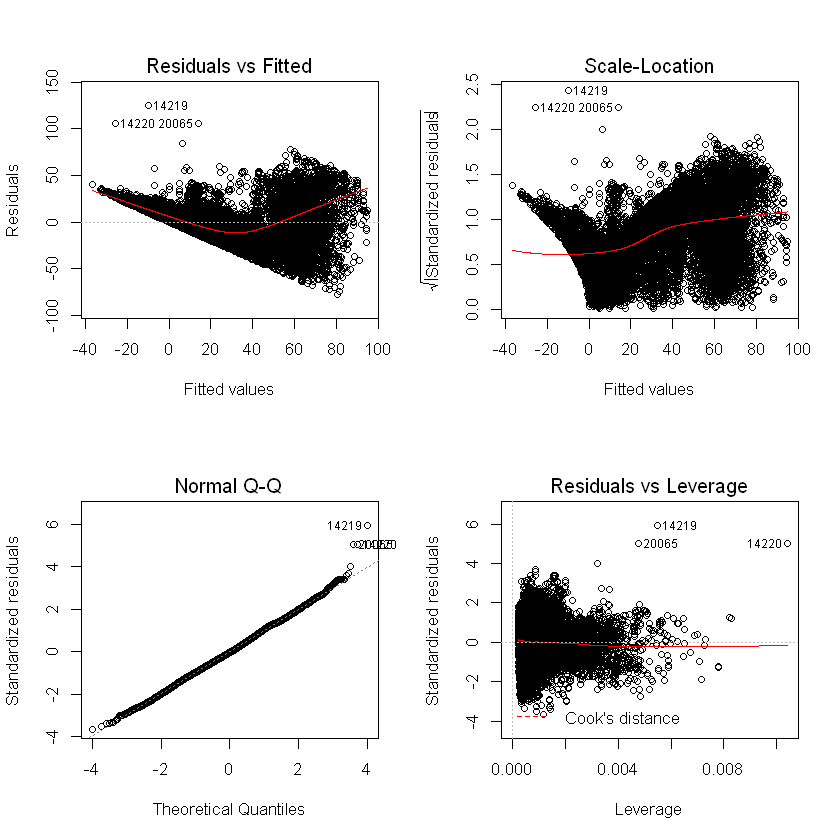

In [60]:
#diagnostic plots, 2 rows, 2 column grid
par(mfcol=c(2,2))
plot(my_fit2)

The diagnostic plots show residuals in four different ways:

* Residuals vs fitted plot - Through the above residuals vs fitted plot, we can see that the variability is different at few values of X. There seems to be some kind of curvature along the horizontal line (i.e. the residuals are not evenly spread) which indicates a non-linear relationship between the target i.e. critical_temp and all the predictors. 

* Normal Q-Q plot (i.e. quantile-quantile plot): The normal Q-Q plot shows if residuals are normally distributed. In linear regression, we assume that the residual is normally distributed with constant variance and mean equal to zero.
From the above Q-Q plot, we can see that the residuals are closely fit along the straight line which indicates that the residuals seem to have a normal distribution.

* Scale-Location plot : The scale-location plot checks the assumption of equal variance by showing if residuals are spread equally
along the predictor ranges. From the above plot, we can see that the residuals are spread randomly along the horizontal line.

* Residual-Leverage plot : This plot helps us to identify influential data points which can alter the results if we exclude them from the analysis. The samples that are located at the upper right or lower right corner are considered as highly influential samples which are identified by Cooks distance (indicated by a dashed red line).
When the samples are outside the Cooks distance, they are influential to regression results. The regression results will be altered if we exclude those samples. From the above residual leverage plot, we can see some outliers such as 14996, 14219, etc. All the influential samples are well inside the Cooks distance lines but we can see few of the outliers that may affect the regression line.


##### Making Predictions

Now, we make predictions using the fitted model on the test dataset.

In [61]:
#predictions
pred<-predict(my_fit2, newdata = test_df)

test_df$pred<-pred
head(test_df)

,std_Valence,wtd_entropy_fie,gmean_Density,std_FusionHeat,range_ElectronAffinity,wtd_entropy_ElectronAffinity,mean_Valence,entropy_Density,wtd_gmean_atomic_mass,wtd_range_fie,...,wtd_entropy_Density,entropy_ElectronAffinity,std_atomic_radius,std_atomic_mass,wtd_entropy_atomic_mass,wtd_entropy_FusionHeat,std_fie,std_ThermalConductivity,critical_temp,pred
2,0.2108185,0.3959060,0.05470315,0.08663431,0.3640401,0.5005769,0.1666667,0.6725909,0.1663406,0.5936504,...,0.5370384,0.8078129,0.5828686,0.4661926,0.5401661,0.6141916,0.5807471,0.9235693,26,40.82588
4,0.1443376,0.3841960,0.03203054,0.08906873,0.3640401,0.4696792,0.2083333,0.5286448,0.1650023,0.5907832,...,0.4631203,0.6560308,0.6514073,0.5144425,0.5220555,0.5517688,0.6480488,0.7854192,22,46.42368
5,0.1443376,0.3949992,0.03203054,0.08906873,0.3640401,0.4699751,0.2083333,0.5286448,0.1649596,0.5821817,...,0.5047555,0.6560308,0.6514073,0.5144425,0.5766632,0.5980944,0.6480488,0.7854192,23,50.50156
8,0.1443376,0.3808237,0.02979630,0.08906873,0.3895989,0.4652004,0.2083333,0.5096375,0.1639001,0.5931198,...,0.4377751,0.6203836,0.5677890,0.4384240,0.4818501,0.5308483,0.6294249,0.7755958,33,41.55049
11,0.1443376,0.3978966,0.02979630,0.08906873,0.3895989,0.4602922,0.2083333,0.5096375,0.1616325,0.5805898,...,0.4875852,0.6203836,0.5677890,0.4384240,0.5503937,0.5980944,0.6294249,0.7755958,33,47.45106
16,0.2108185,0.4142336,0.05470315,0.08663431,0.3640401,0.5368006,0.1666667,0.6725909,0.1717378,0.5936504,...,0.6287900,0.8078129,0.5828686,0.4661926,0.5856998,0.7211782,0.5807471,0.9235693,27,40.25702


Further, we calculate the mean squared error of this fitted model. Mean Squared error is calculated by taking into account, the average value of all the squared residuals or error terms. Lower the MSE, better the model can make accurate predictions.

In [62]:
#calculating MSE of test data
mse_init_model<-mean((pred - test_df$critical_temp)^2)
print(mse_init_model)

[1] 452.1574


We see that the MSE of this model is 452.15. 


<u> Initial Model : Multiple Linear Regression Model (MSE : 452.15, No of Features : 17) </u>

#### Model Building using Wrapper Methods (Stepwise Forward, Stepwise Backward and Stepwise Combined) and selecting the best one amongst them.

The stepwise regression/selection consists of iteratively adding/removing the predictors, in the predictive model in order to find the subset of variables in the dataset resulting in best performing model i.e. a model with lowest prediction error. It consists of three strategies :

* Forward Selection - It starts with no predictors in the model and iteratively adds the most contributing predictors.
* Backward Selection/Elimination - It starts with all the predictors in the model and iteratively removes the least contributing predictors.
* Stepwise Combined/Hybrid Selection - It also starts with no predictors in the model and performs a mix of forward/backward operations.


Here we build three linear models, one with step wise forward selection, one with step wise backward selection and one with hybrid selection. We use the step() function in R which gives the best subset of features on the basis of a metric called AIC (Akiko Information Criterion). AIC is a measure of goodness of fit. Lower the AIC, better the fit. 

First, we use stepwise forward selection to build a model. We divide the data into training and test sets in 70:30 ratio.

In [63]:
#setting a seed value to reproduce the results
set.seed(123)

sc_df<-data.frame(read.csv('train.csv'))
#splitting in 70:30 ratio and building training and test sets
sample <- sample(c(TRUE, FALSE), nrow(sc_df), replace = T, prob = c(0.7,0.3))
train_df_step_fwd <- sc_df[sample, ]
test_df_step_fwd<- sc_df[!sample, ]

We define our empty model i.e. the one with no predictors (fitStart) and full model i.e. the one with full set of predictors (fitAll).

In [64]:
#empty model
fitStart<-lm(critical_temp~1,data=train_df_step_fwd)
#print(formula(fitStart))

In [65]:
#full model
fitAll<-lm(critical_temp~.,data=train_df_step_fwd)
print(formula(fitAll))

critical_temp ~ number_of_elements + mean_atomic_mass + wtd_mean_atomic_mass + 
    gmean_atomic_mass + wtd_gmean_atomic_mass + entropy_atomic_mass + 
    wtd_entropy_atomic_mass + range_atomic_mass + wtd_range_atomic_mass + 
    std_atomic_mass + wtd_std_atomic_mass + mean_fie + wtd_mean_fie + 
    gmean_fie + wtd_gmean_fie + entropy_fie + wtd_entropy_fie + 
    range_fie + wtd_range_fie + std_fie + wtd_std_fie + mean_atomic_radius + 
    wtd_mean_atomic_radius + gmean_atomic_radius + wtd_gmean_atomic_radius + 
    entropy_atomic_radius + wtd_entropy_atomic_radius + range_atomic_radius + 
    wtd_range_atomic_radius + std_atomic_radius + wtd_std_atomic_radius + 
    mean_Density + wtd_mean_Density + gmean_Density + wtd_gmean_Density + 
    entropy_Density + wtd_entropy_Density + range_Density + wtd_range_Density + 
    std_Density + wtd_std_Density + mean_ElectronAffinity + wtd_mean_ElectronAffinity + 
    gmean_ElectronAffinity + wtd_gmean_ElectronAffinity + entropy_ElectronAffinity 

In [126]:
#iteratively add all the features until it reaches a stopping condition.
step_fwd_mod<-step(fitStart,direction='forward',scope=formula(fitAll),trace=0)
summary(step_fwd_mod)


Call:
lm(formula = critical_temp ~ wtd_std_ThermalConductivity + gmean_ElectronAffinity + 
    range_atomic_radius + std_atomic_radius + entropy_ElectronAffinity + 
    wtd_gmean_ElectronAffinity + wtd_std_Valence + wtd_entropy_atomic_mass + 
    wtd_entropy_Density + range_atomic_mass + wtd_std_atomic_mass + 
    wtd_entropy_ThermalConductivity + range_Density + range_ThermalConductivity + 
    wtd_range_Valence + wtd_entropy_FusionHeat + gmean_ThermalConductivity + 
    wtd_mean_ThermalConductivity + wtd_gmean_ThermalConductivity + 
    wtd_entropy_ElectronAffinity + wtd_range_ThermalConductivity + 
    wtd_std_ElectronAffinity + std_ElectronAffinity + range_ElectronAffinity + 
    wtd_mean_ElectronAffinity + entropy_atomic_mass + range_FusionHeat + 
    wtd_std_atomic_radius + wtd_entropy_fie + wtd_entropy_Valence + 
    range_Valence + wtd_range_FusionHeat + std_ThermalConductivity + 
    wtd_range_fie + wtd_range_ElectronAffinity + mean_ElectronAffinity + 
    wtd_mean_atomic_rad

Here, we can see that linear regression model using stepwise forward selection gives an R-Squared value of 74.08 and adjusted R-Squared of 73.94 with the best subset of 71 features.

In [68]:
coef(step_fwd_mod)

(Intercept)     wtd_std_ThermalConductivity 
                  -20.487973180                    -0.026344359 
         gmean_ElectronAffinity             range_atomic_radius 
                    0.173225670                     0.191737631 
              std_atomic_radius        entropy_ElectronAffinity 
                   -0.486793945                     6.282464275 
     wtd_gmean_ElectronAffinity                 wtd_std_Valence 
                   -0.645309713                   -18.704893396 
        wtd_entropy_atomic_mass             wtd_entropy_Density 
                    6.817199183                   -20.720502153 
              range_atomic_mass             wtd_std_atomic_mass 
                    0.216930429                     0.045863480 
wtd_entropy_ThermalConductivity                   range_Density 
                    0.283825487                    -0.001478893 
      range_ThermalConductivity               wtd_range_Valence 
                   -0.099054545                    -1.083904166 
         wtd_entropy_FusionHeat       gmean_ThermalConductivity 
                   27.598976807                    -0.038886093 
   wtd_mean_ThermalConductivity   wtd_gmean_ThermalConductivity 
                    0.549331063                    -0.353389955 
   wtd_entropy_ElectronAffinity   wtd_range_ThermalConductivity 
                  -19.962563208                    -0.222765212 
       wtd_std_ElectronAffinity            std_ElectronAffinity 
                   -0.595686843                     1.305911713 
         range_ElectronAffinity       wtd_mean_ElectronAffinity 
                   -0.387887719                     0.571859213 
            entropy_atomic_mass                range_FusionHeat 
                  -33.614206950                    -0.410342453 
          wtd_std_atomic_radius                 wtd_entropy_fie 
                   -0.182598151                    53.569216939 
            wtd_entropy_Valence                   range_Valence 
                  -81.578461642                     5.530820380 
           wtd_range_FusionHeat         std_ThermalConductivity 
                    0.581965573                     0.320930035 
                  wtd_range_fie      wtd_range_ElectronAffinity 
                    0.025042183                    -0.125584596 
          mean_ElectronAffinity          wtd_mean_atomic_radius 
                   -0.093616664                     2.789733275 
        wtd_gmean_atomic_radius                     wtd_std_fie 
                   -2.412003141                    -0.060704664 
        wtd_range_atomic_radius              mean_atomic_radius 
                   -0.087088695                    -0.311893560 
      wtd_entropy_atomic_radius                  std_FusionHeat 
                   43.467225199                    -0.443175287 
                entropy_Valence                     entropy_fie 
                   84.019931744                   -91.350567491 
             wtd_std_FusionHeat             wtd_mean_FusionHeat 
                    0.772034456                    -1.893125416 
           wtd_gmean_FusionHeat                     std_Density 
                    1.590023363                     0.005988636 
                wtd_std_Density                 entropy_Density 
                   -0.001558000                    16.809194467 
                std_atomic_mass              entropy_FusionHeat 
                   -0.533251465                   -23.619155578 
                   mean_Density                mean_atomic_mass 
                   -0.005005455                     0.805029494 
                  gmean_Density            wtd_mean_atomic_mass 
                    0.001479625                    -0.790836219 
              wtd_gmean_Density                    wtd_mean_fie 
                    0.002049074                     0.022906718 
                mean_FusionHeat                gmean_FusionHeat 
                    1.568418608                    -1.3

Further, we perform predictions on the test set to see its performance.

In [69]:
#predicting on the test set
pred<-predict(step_fwd_mod, newdata = test_df_step_fwd)
test_df_step_fwd$pred_tc_fwd<-pred

In [70]:
head(test_df_step_fwd[,c(82,83)])

,critical_temp,pred_tc_fwd
2,26,39.76508
4,22,28.91990
5,23,34.84164
8,33,22.51645
11,33,31.77760
16,27,50.40658


In [71]:
#displaying MSE of linear model built using stepwise forward selection
mean((pred - test_df_step_fwd$critical_temp)^2)

[1] 320.0386

We can see that the linear regression model built using stepwise forward selection has a mean squared error of 320.

Now, we build a model using stepwise backward and stepwise combined selection and at the end, after predictions, we compare mean squared errors of all the models. We select the one as the best model which has the lowest mean squared error.

In [72]:
#setting a seed value to reproduce the results
set.seed(123)

#splitting in 70:30 ratio and building training and test sets
sample <- sample(c(TRUE, FALSE), nrow(sc_df), replace = T, prob = c(0.7,0.3))
train_df_step_bwd <- sc_df[sample, ]
test_df_step_bwd<- sc_df[!sample, ]

In [127]:
#recursively remove each feature until it reaches a stopping condition.
step_bwd_mod<-step(fitAll, direction='backward',scope=formula(fitStart),trace=0)
summary(step_bwd_mod)


Call:
lm(formula = critical_temp ~ number_of_elements + mean_atomic_mass + 
    wtd_mean_atomic_mass + gmean_atomic_mass + wtd_gmean_atomic_mass + 
    entropy_atomic_mass + wtd_entropy_atomic_mass + range_atomic_mass + 
    std_atomic_mass + wtd_std_atomic_mass + wtd_gmean_fie + entropy_fie + 
    wtd_entropy_fie + range_fie + wtd_range_fie + std_fie + wtd_std_fie + 
    mean_atomic_radius + wtd_mean_atomic_radius + wtd_gmean_atomic_radius + 
    entropy_atomic_radius + wtd_entropy_atomic_radius + range_atomic_radius + 
    wtd_range_atomic_radius + std_atomic_radius + wtd_std_atomic_radius + 
    mean_Density + gmean_Density + wtd_gmean_Density + entropy_Density + 
    wtd_entropy_Density + range_Density + std_Density + wtd_std_Density + 
    mean_ElectronAffinity + wtd_mean_ElectronAffinity + gmean_ElectronAffinity + 
    wtd_gmean_ElectronAffinity + entropy_ElectronAffinity + wtd_entropy_ElectronAffinity + 
    range_ElectronAffinity + wtd_range_ElectronAffinity + std_ElectronAffi

Here, we can see that linear regression model using stepwise backward selection gives an R-Squared value of 74.08 and adjusted R-Squared of 73.96 with the best subset of 72 features. Both stepwise forward and stepwise backward gives similar statistics.

In [74]:
#displaying the coefficients of the model
coef(step_bwd_mod)

(Intercept)            number_of_elements 
                -21.249578549                  -2.760349351 
             mean_atomic_mass          wtd_mean_atomic_mass 
                  0.857970698                  -0.856534604 
            gmean_atomic_mass         wtd_gmean_atomic_mass 
                 -0.546845559                   0.639298670 
          entropy_atomic_mass       wtd_entropy_atomic_mass 
                -32.436423917                   7.111064076 
            range_atomic_mass               std_atomic_mass 
                  0.219276746                  -0.572450147 
          wtd_std_atomic_mass                 wtd_gmean_fie 
                  0.091761574                   0.022938964 
                  entropy_fie               wtd_entropy_fie 
                -95.208315499                  49.907614075 
                    range_fie                 wtd_range_fie 
                  0.076233657                   0.025584087 
                      std_fie                   wtd_std_fie 
                 -0.179748525                  -0.063056269 
           mean_atomic_radius        wtd_mean_atomic_radius 
                 -0.305247876                   2.799330873 
      wtd_gmean_atomic_radius         entropy_atomic_radius 
                 -2.429966278                  44.352321273 
    wtd_entropy_atomic_radius           range_atomic_radius 
                 40.655256629                   0.183793819 
      wtd_range_atomic_radius             std_atomic_radius 
                 -0.085368965                  -0.468257670 
        wtd_std_atomic_radius                  mean_Density 
                 -0.180537156                  -0.005022862 
                gmean_Density             wtd_gmean_Density 
                  0.001630124                   0.001881586 
              entropy_Density           wtd_entropy_Density 
                 16.069370369                 -21.518688286 
                range_Density                   std_Density 
                 -0.001542201                   0.006407853 
              wtd_std_Density         mean_ElectronAffinity 
                 -0.001938819                  -0.080151622 
    wtd_mean_ElectronAffinity        gmean_ElectronAffinity 
                  0.548990266                   0.175672140 
   wtd_gmean_ElectronAffinity      entropy_ElectronAffinity 
                 -0.642485965                   5.776082079 
 wtd_entropy_ElectronAffinity        range_ElectronAffinity 
                -19.919690901                  -0.381239694 
   wtd_range_ElectronAffinity          std_ElectronAffinity 
                 -0.115872519                   1.281665723 
     wtd_std_ElectronAffinity               mean_FusionHeat 
                 -0.590391611                   1.641265596 
          wtd_mean_FusionHeat              gmean_FusionHeat 
                 -1.932613459                  -1.456155088 
         wtd_gmean_FusionHeat            entropy_FusionHeat 
                  1.628979875                 -23.716284493 
       wtd_entropy_FusionHeat              range_FusionHeat 
                 27.512462591                  -0.408549708 
         wtd_range_FusionHeat                std_FusionHeat 
                  0.582537374                  -0.500005438 
           wtd_std_FusionHeat      mean_ThermalConductivity 
                  0.819892112                  -0.072150680 
 wtd_mean_ThermalConductivity     gmean_ThermalConductivity 
                  0.526764750                  -0.057892253 
wtd_gmean_ThermalConductivity   entropy_ThermalConductivity 
                 -0.320117536                  12.527877100 
    range_ThermalConductivity wtd_range_ThermalConductivity 
                 -0.101751508                  -0.229167412 
      std_ThermalConductivity                  mean_Valence 
                  0.312740167                 -18.111992194 
             wtd_mean_Valence                 gmean_Valence 
                 25.362483638                  21.192

In [75]:
#predicting on the test set
pred<-predict(step_bwd_mod, newdata = test_df_step_bwd)
test_df_step_bwd$pred_tc_bwd<-pred

In [76]:
head(test_df_step_bwd[,c(82,83)])
#displaying MSE of linear model built using stepwise forward selection
mse_bwd<-mean((pred - test_df_step_bwd$critical_temp)^2)
print(mse_bwd)

,critical_temp,pred_tc_bwd
2,26,39.73253
4,22,28.61881
5,23,34.52366
8,33,22.45834
11,33,31.68592
16,27,50.02602


[1] 319.8804


We can see that the linear model built using stepwise backward regression has a mean squared error of 319.88.

In [77]:
#setting a seed value to reproduce the results
set.seed(123)

#splitting in 70:30 ratio and building training and test sets
sample <- sample(c(TRUE, FALSE), nrow(sc_df), replace = T, prob = c(0.7,0.3))
train_df_step_mix <- sc_df[sample, ]
test_df_step_mix<- sc_df[!sample, ]

In [129]:
#iteratively add/remove all the features until it reaches a stopping condition.
step_mix_mod<-step(fitStart,direction='both',scope=formula(fitAll),trace=0)

In [130]:
summary(step_mix_mod)


Call:
lm(formula = critical_temp ~ gmean_ElectronAffinity + range_atomic_radius + 
    std_atomic_radius + entropy_ElectronAffinity + wtd_gmean_ElectronAffinity + 
    wtd_std_Valence + wtd_entropy_atomic_mass + wtd_entropy_Density + 
    range_atomic_mass + range_Density + range_ThermalConductivity + 
    wtd_range_Valence + wtd_entropy_FusionHeat + gmean_ThermalConductivity + 
    wtd_mean_ThermalConductivity + wtd_gmean_ThermalConductivity + 
    wtd_entropy_ElectronAffinity + wtd_range_ThermalConductivity + 
    wtd_std_ElectronAffinity + std_ElectronAffinity + range_ElectronAffinity + 
    wtd_mean_ElectronAffinity + entropy_atomic_mass + range_FusionHeat + 
    wtd_std_atomic_radius + wtd_entropy_fie + wtd_entropy_Valence + 
    range_Valence + wtd_range_FusionHeat + std_ThermalConductivity + 
    wtd_range_fie + wtd_range_ElectronAffinity + mean_ElectronAffinity + 
    wtd_mean_atomic_radius + wtd_gmean_atomic_radius + wtd_std_fie + 
    wtd_range_atomic_radius + mean_atomic_ra

Here, we can see that linear regression model using stepwise backward selection gives an R-Squared value of 74.06 and adjusted R-Squared of 73.95 with the best subset of 68 features.

In [80]:
#displaying the coefficients of the model
coef(step_mix_mod)

(Intercept)        gmean_ElectronAffinity 
                -20.614377842                   0.175404675 
          range_atomic_radius             std_atomic_radius 
                  0.194002467                  -0.482864295 
     entropy_ElectronAffinity    wtd_gmean_ElectronAffinity 
                  6.320113754                  -0.651793169 
              wtd_std_Valence       wtd_entropy_atomic_mass 
                -18.737762772                   6.494138435 
          wtd_entropy_Density             range_atomic_mass 
                -20.405939566                   0.215581156 
                range_Density     range_ThermalConductivity 
                 -0.001509526                  -0.101759975 
            wtd_range_Valence        wtd_entropy_FusionHeat 
                 -1.117211218                  27.363520714 
    gmean_ThermalConductivity  wtd_mean_ThermalConductivity 
                 -0.051617021                   0.529208762 
wtd_gmean_ThermalConductivity  wtd_entropy_ElectronAffinity 
                 -0.328365072                 -19.993330243 
wtd_range_ThermalConductivity      wtd_std_ElectronAffinity 
                 -0.225413164                  -0.595163513 
         std_ElectronAffinity        range_ElectronAffinity 
                  1.304530394                  -0.388329735 
    wtd_mean_ElectronAffinity           entropy_atomic_mass 
                  0.576540359                 -32.796253089 
             range_FusionHeat         wtd_std_atomic_radius 
                 -0.406109423                  -0.187570976 
              wtd_entropy_fie           wtd_entropy_Valence 
                 53.626877925                 -80.690554730 
                range_Valence          wtd_range_FusionHeat 
                  5.586878901                   0.585263201 
      std_ThermalConductivity                 wtd_range_fie 
                  0.309974807                   0.025751649 
   wtd_range_ElectronAffinity         mean_ElectronAffinity 
                 -0.125941579                  -0.093855744 
       wtd_mean_atomic_radius       wtd_gmean_atomic_radius 
                  2.775442324                  -2.393876954 
                  wtd_std_fie       wtd_range_atomic_radius 
                 -0.060575125                  -0.089765242 
           mean_atomic_radius     wtd_entropy_atomic_radius 
                 -0.314880162                  42.954255043 
               std_FusionHeat               entropy_Valence 
                 -0.451959215                  84.327445759 
                  entropy_fie            wtd_std_FusionHeat 
                -92.331124176                   0.758642108 
          wtd_mean_FusionHeat          wtd_gmean_FusionHeat 
                 -1.875044715                   1.567745066 
                  std_Density               wtd_std_Density 
                  0.006014619                  -0.001513600 
              entropy_Density               std_atomic_mass 
                 16.500432400                  -0.495169774 
           entropy_FusionHeat                  mean_Density 
                -23.410855629                  -0.005027075 
             mean_atomic_mass                 gmean_Density 
                  0.771498266                   0.001529313 
         wtd_mean_atomic_mass             wtd_gmean_Density 
                 -0.730793262                   0.002016283 
                 wtd_mean_fie               mean_FusionHeat 
                  0.022669673                   1.569938429 
             gmean_FusionHeat                     range_fie 
                 -1.387037503                   0.073809743 
                      std_fie   entropy_ThermalConductivity 
                 -0.176960242                  12.085674293 
     mean_ThermalConductivity            number_of_elements 
                 -0.073348538                  -2.897272304 
            gmean_atomic_mass         wtd_gmean_atomic_mass 
                 -0.454203995                   0.504

In [81]:
#predicting on the test set
pred<-predict(step_mix_mod, newdata = test_df_step_mix)
test_df_step_mix$pred_tc_mix<-pred

In [82]:
head(test_df_step_mix[,c(82,83)])
#displaying MSE of linear model built using stepwise forward selection
mean((pred - test_df_step_mix$critical_temp)^2)

,critical_temp,pred_tc_mix
2,26,39.87888
4,22,29.02237
5,23,34.91379
8,33,22.48257
11,33,31.71943
16,27,50.51833


[1] 320.0256

The mean squared error for this model is almost similar to that of model built using stepwise forward selection. So we select the linear model built using stepwise backward selection as the best model which has 72 features and has the lowest MSE. 

<u> Best Model Selected : Linear Model built using Stepwise Backward Selection (MSE : 319.88, No of features : 72) </u>

So, now we apply stepwise backward selection on the subset of features which we extracted using filter based variance threshold and correlation analysis.

In [83]:
fit_bwd_subset<-step(my_fit2,direction='backward')
summary(fit_bwd_subset)

Start:  AIC=91291.96
critical_temp ~ std_Valence + wtd_entropy_fie + gmean_Density + 
    range_ElectronAffinity + wtd_entropy_ElectronAffinity + entropy_Density + 
    wtd_gmean_atomic_mass + wtd_range_fie + range_Density + wtd_entropy_Density + 
    entropy_ElectronAffinity + std_atomic_radius + std_atomic_mass + 
    wtd_entropy_atomic_mass + wtd_entropy_FusionHeat + std_fie + 
    std_ThermalConductivity

                               Df Sum of Sq     RSS   AIC
<none>                                      6672288 91292
- wtd_range_fie                 1      2571 6674858 91296
- std_fie                       1      3461 6675748 91298
- range_Density                 1      4451 6676739 91300
- std_atomic_radius             1      9178 6681466 91311
- range_ElectronAffinity        1     35010 6707298 91368
- wtd_entropy_FusionHeat        1     52623 6724911 91407
- entropy_Density               1     53379 6725666 91409
- wtd_gmean_atomic_mass         1     60081 6732369 91424
- gmean


Call:
lm(formula = critical_temp ~ std_Valence + wtd_entropy_fie + 
    gmean_Density + range_ElectronAffinity + wtd_entropy_ElectronAffinity + 
    entropy_Density + wtd_gmean_atomic_mass + wtd_range_fie + 
    range_Density + wtd_entropy_Density + entropy_ElectronAffinity + 
    std_atomic_radius + std_atomic_mass + wtd_entropy_atomic_mass + 
    wtd_entropy_FusionHeat + std_fie + std_ThermalConductivity, 
    data = subset(train_df, select = c(-std_FusionHeat, -mean_Valence)))

Residuals:
    Min      1Q  Median      3Q     Max 
-77.514 -14.190  -0.793  14.233 125.060 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -4.407      1.398  -3.152  0.00163 ** 
std_Valence                   -28.002      1.307 -21.431  < 2e-16 ***
wtd_entropy_fie                60.118      4.287  14.025  < 2e-16 ***
gmean_Density                 -37.594      2.845 -13.214  < 2e-16 ***
range_ElectronAffinity        -14.479      1.635  -8.85

We can see that stepwise backward selection did not remove any feature from the subset of 17 features because all these features are statistically significant.

Since we had already removed features on the basis of low variance, low correlation with the target, multi-collinear features, stepwise backward selection 
did not remove any additional feature.

#### Model Building using Embedded Methods (Ridge, Lasso and Elastic Net) and selecting the best one amongst them.

The basic idea behind <b> Ridge Regression </b> (also known as L2 Regularization) is to minimize the loss function which comprises of two elements i.e. Sum of squared Residuals and regularization term. Regularization term is given by lambda * sum of beta squared values. 
The main goal is to punish the loss function for high values of coefficients beta thereby making the model simple and avoiding over-fitting. By punishing the beta values, we add a constraint to minimize them as much as possible. 

Ridge regression do not get rid of the irrelevant features but it minimizes their impact on the trained model. Also, it removes multi-collinearity. 

Here, we load the dataframe again to build model using ridge regression. We split it into training and test set in 70:30 ratio i.e 70% of the data is assigned to training set and 30% of the data is assigned to test set.

In [84]:
#reading the dataframe
sc_df<-data.frame(read.csv('train.csv'))

#displaying initial few rows
head(sc_df)

number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
4,88.94447,57.86269,66.36159,36.11661,1.181795,1.0623955,122.9061,31.79492,51.96883,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.4330127,0.4370588,29
5,92.72921,58.51842,73.13279,36.39660,1.449309,1.0577551,122.9061,36.16194,47.09463,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.6324555,0.4686063,26
4,88.94447,57.88524,66.36159,36.12251,1.181795,0.9759805,122.9061,35.74110,51.96883,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.4330127,0.4446966,19
4,88.94447,57.87397,66.36159,36.11956,1.181795,1.0222909,122.9061,33.76801,51.96883,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.4330127,0.4409521,22
4,88.94447,57.84014,66.36159,36.11072,1.181795,1.1292237,122.9061,27.84874,51.96883,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.4330127,0.4288095,23
4,88.94447,57.79504,66.36159,36.09893,1.181795,1.2252028,122.9061,20.68746,51.96883,...,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.4330127,0.4103259,23


In [85]:
#setting a seed value to reproduce the results
set.seed(123)

#splitting in 70:30 ratio and building training and test sets
sample <- sample(c(TRUE, FALSE), nrow(sc_df), replace = T, prob = c(0.7,0.3))
train_df_ridge <- sc_df[sample, ]
test_df_ridge<- sc_df[!sample, ]

In [86]:
print(dim(train_df_ridge))
print(dim(test_df_ridge))

[1] 14959    82
[1] 6304   82


In [87]:
#displaying initial few rows of the training dataframe
head(train_df_ridge)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
1,4,88.94447,57.86269,66.36159,36.11661,1.181795,1.0623955,122.9061,31.79492,51.96883,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.0857143,0.4330127,0.4370588,29
3,4,88.94447,57.88524,66.36159,36.12251,1.181795,0.9759805,122.9061,35.74110,51.96883,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.1142857,0.4330127,0.4446966,19
6,4,88.94447,57.79504,66.36159,36.09893,1.181795,1.2252028,122.9061,20.68746,51.96883,...,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.0000000,0.4330127,0.4103259,23
7,4,88.94447,57.68230,66.36159,36.06947,1.181795,1.3168566,122.9061,10.76564,51.96883,...,2.142857,2.213364,2.119268,1.368922,1.194453,1,0.8571429,0.4330127,0.3499271,11
9,4,76.51772,56.80882,59.31010,35.77343,1.197273,0.9818798,122.9061,34.83316,44.28946,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.1000000,0.4330127,0.4409521,36
10,4,76.51772,56.44249,59.31010,35.65588,1.197273,1.0164954,122.9061,33.21512,44.28946,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.0857143,0.4330127,0.4370588,31


We further create two objects to store the predictors and the response variable i.e. critical_temp.

In [88]:
#predictors
x <- model.matrix(critical_temp~., train_df_ridge)[,-1]# Response

#target
y <- train_df_ridge$critical_temp

We know that in regularization, lambda values have a large effect on coefficients so now we will compute and choose a suitable one.
Here, we perform cross validation and take a peek at the lambda value corresponding to the lowest prediction error before fitting
the data to the model and viewing the coefficients. 

In [89]:
#cross validation to select the best lambda
#alpha=0 indicates ridge regression
cv.r <- cv.glmnet(x, y, alpha = 0)
bestlamb<-cv.r$lambda.min
print(bestlamb)

#fitting a ridge regression model
model.ridge <- glmnet(x, y, alpha = 0, lambda = cv.r$lambda.min)

#viewing the coefficients of the model
coef(model.ridge)

[1] 2.471715


82 x 1 sparse Matrix of class "dgCMatrix"
                                           s0
(Intercept)                     -3.128435e+01
number_of_elements               1.158466e+00
mean_atomic_mass                 5.190875e-02
wtd_mean_atomic_mass            -1.022623e-02
gmean_atomic_mass                2.275547e-02
wtd_gmean_atomic_mass            2.340651e-02
entropy_atomic_mass             -4.944995e+00
wtd_entropy_atomic_mass          9.886379e+00
range_atomic_mass                9.261047e-02
wtd_range_atomic_mass           -8.102144e-02
std_atomic_mass                  1.176208e-01
wtd_std_atomic_mass             -1.578192e-01
mean_fie                         1.342284e-02
wtd_mean_fie                    -1.053957e-03
gmean_fie                        2.086778e-02
wtd_gmean_fie                    8.245219e-04
entropy_fie                      2.748715e-01
wtd_entropy_fie                  1.162868e+00
range_fie                        7.257755e-03
wtd_range_fie                    2.986

We can see that the best lamda value selected was 2.47 as per lowest prediction error. We can also see that few coefficients such as wtd_entropy_FusionHeat have a significantly higher weight compared to others. 

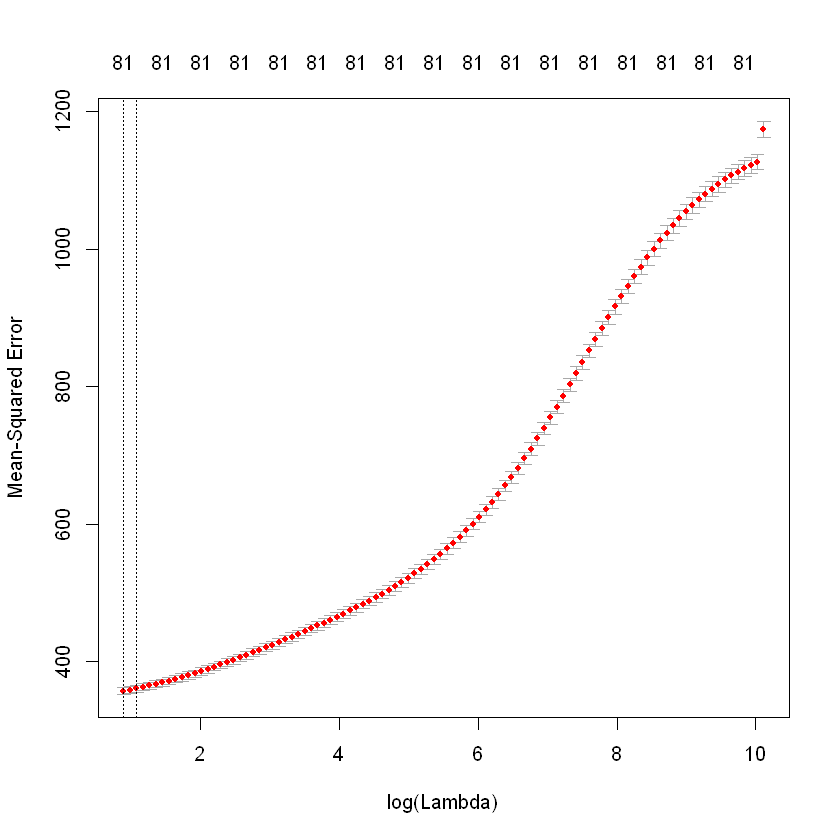

In [90]:
plot(cv.r)

The above plot illustrates the 10-fold cross validation mean squared error (MSE) across lambda values. As we constraint our coefficients with log(lambda) >= 1.5 penalty, the MSE rises considerably. The numbers at the top of the plot just refers to number of variables in the model. Ridge regression does not force any variables to be exactly zero so all the variables remain in the model.

Warning message:
"'tidy.dgCMatrix' is deprecated.
See help("Deprecated")"Warning message:
"'tidy.dgTMatrix' is deprecated.
See help("Deprecated")"

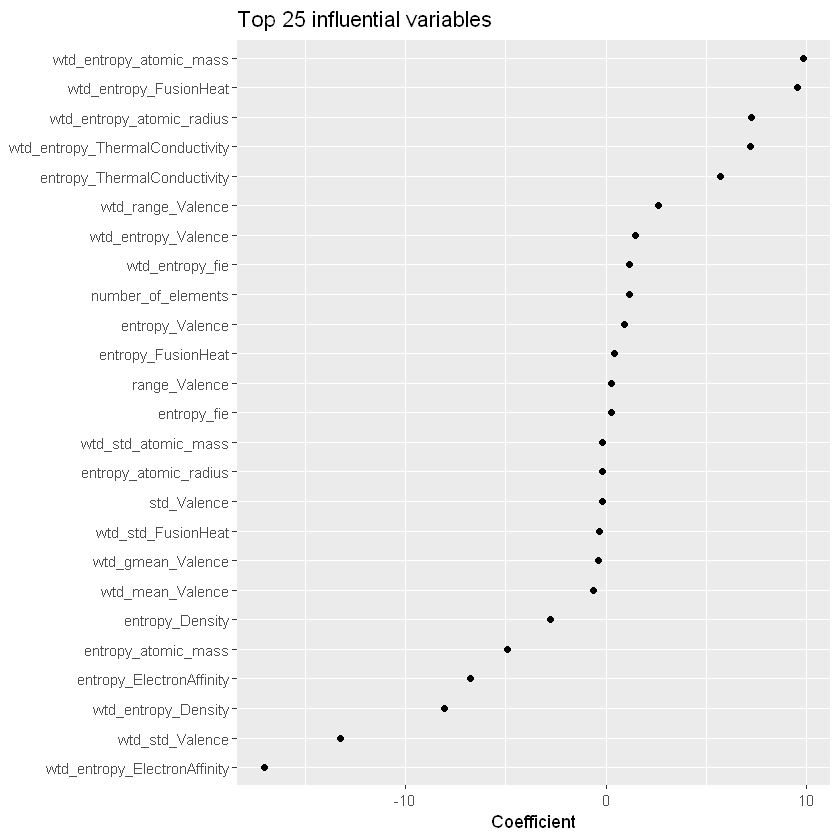

In [91]:
coef(model.ridge, s = "lambda.1se") %>%
  tidy() %>%
  filter(row != "(Intercept)") %>%
  top_n(25, wt = abs(value)) %>%
  ggplot(aes(value, reorder(row, value))) +
  geom_point() +
  ggtitle("Top 25 influential variables") +
  xlab("Coefficient") +
  ylab(NULL)

From the above plot, we can see that ridge regression has pushed many of the correlated features towards each other rather than allowing for one to be wildly positive and the other wildly negative. Further, many of the non-important features have been pushed closer to zero. This means we have reduced the noise in our data, which provides us more clarity in identifying the true signals in our model.

We will now see how our model performs by using the test data on it.

In [92]:
#predictions
x.test.ridge <- model.matrix(critical_temp ~., test_df_ridge)[,-1]
pred.ridge <- predict(model.ridge, s = bestlamb, newx = x.test.ridge)
test_df_ridge$ridge_pred<-pred.ridge

In [93]:
head(test_df_ridge[,c(82,83)])

,critical_temp,ridge_pred
2,26,41.31134
4,22,37.98804
5,23,41.93135
8,33,34.21223
11,33,40.06206
16,27,44.06990


Having a look at the predictions, we can observe that few values are predicted close to actual while few are having a high difference than the actual.

In [94]:
#calculating MSE, RMSE and R2-Squared of Ridge
print(mean((pred.ridge - test_df_ridge$critical_temp)^2))
print(RMSE(pred.ridge, test_df_ridge$critical_temp))
print(R2(pred.ridge, test_df_ridge$critical_temp))

[1] 364.0927
[1] 19.08121
             1
[1,] 0.6895259


We can see that the Mean Squared Error (MSE) for the ridge model is 364.09 and R2-Squared is 68.95. Comparing this with our initial linear model built using multiple regression, this model does a better job in giving accurate predictions.

Now, we build a model using <b> Lasso Regression </b> (L1 Regularization). The only difference between Lasso and Ridge regression is that here in Lasso, the regularization term is an absolute value. Lasso overcomes the advantage of Ridge by not only punishing the high values of coefficients beta but actually setting them to 0 if they are not relevant thereby reducing the number of features and making the model simple.

The steps for building the lasso model is identical to that of Ridge but the only change would be setting the alpha value to 1 which indicates a lasso regression.

In [95]:
#setting a seed value to reproduce the results
set.seed(123)

#splitting in 70:30 ratio and building training and test sets
sample <- sample(c(TRUE, FALSE), nrow(sc_df), replace = T, prob = c(0.7,0.3))
train_df_lasso <- sc_df[sample, ]
test_df_lasso<- sc_df[!sample, ]

In [96]:
#predictors
x <- model.matrix(critical_temp~., train_df_lasso)[,-1]# Response

#response
y <- train_df_lasso$critical_temp

In [97]:
#cross validation to select the best lambda value.
cv.l <- cv.glmnet(x, y, alpha = 1)
bestlamb<-cv.l$lambda.min
print(bestlamb)

#fitting the model
model.lasso <- glmnet(x, y, alpha = 1, lambda = cv.l$lambda.min)

#viewing the coefficients
coef(model.lasso)

[1] 0.002471715


82 x 1 sparse Matrix of class "dgCMatrix"
                                           s0
(Intercept)                     -1.771296e+01
number_of_elements              -3.441624e+00
mean_atomic_mass                 5.564727e-01
wtd_mean_atomic_mass            -4.863879e-01
gmean_atomic_mass               -2.393811e-01
wtd_gmean_atomic_mass            2.584718e-01
entropy_atomic_mass             -3.700058e+01
wtd_entropy_atomic_mass          1.140325e+01
range_atomic_mass                2.086677e-01
wtd_range_atomic_mass            1.831625e-02
std_atomic_mass                 -4.126817e-01
wtd_std_atomic_mass             -9.584946e-02
mean_fie                         .           
wtd_mean_fie                     2.328676e-02
gmean_fie                       -3.914720e-03
wtd_gmean_fie                   -1.316105e-03
entropy_fie                     -2.617278e+00
wtd_entropy_fie                  4.689646e+01
range_fie                        7.293766e-02
wtd_range_fie                    2.116

We can see that using cross validation, the best lambda value chosen was 0.00247. Also, coefficients such as mean_fie, wtd_range_Density, std_FusionHeat, wtd_std_ThermalConductivity and wtd_mean_Valence have been totally eliminated/discarded which indicates irrelevant features. So, the lasso model with lambda chosen by cross validation contains only 76 variables and an intercept.

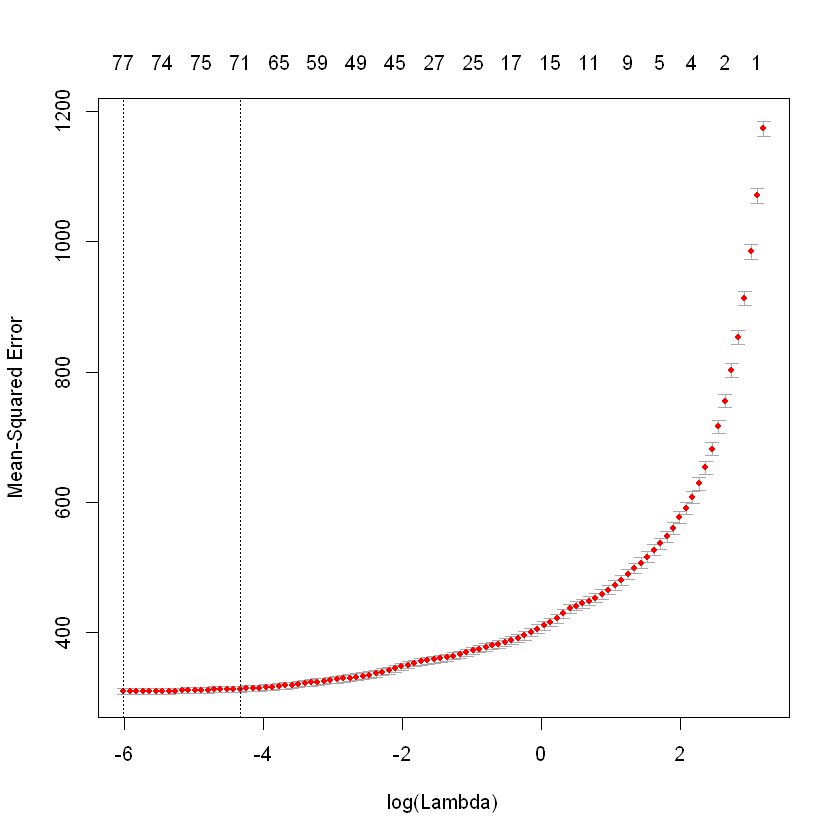

In [98]:
plot(cv.l)

From the above plot, we can see that as the lambda value increases, the mean squared error also increases. If we constraint log(lambda) less than -4, our model will be having lowest mean squared value with features between 71 to 75. 

Now, we refit our lasso model using lambda chosen by cross validation.

In [99]:
#predictions
x.test.lasso <- model.matrix(critical_temp ~., test_df_lasso)[,-1]
pred.lasso <- predict(model.lasso, s = bestlamb, newx = x.test.lasso)
test_df_lasso$lasso_pred<-pred.lasso
head(test_df_lasso[,c(82,83)])

,critical_temp,lasso_pred
2,26,40.10932
4,22,29.48639
5,23,34.99463
8,33,23.03800
11,33,31.67516
16,27,50.32161


Warning message:
"'tidy.dgCMatrix' is deprecated.
See help("Deprecated")"Warning message:
"'tidy.dgTMatrix' is deprecated.
See help("Deprecated")"

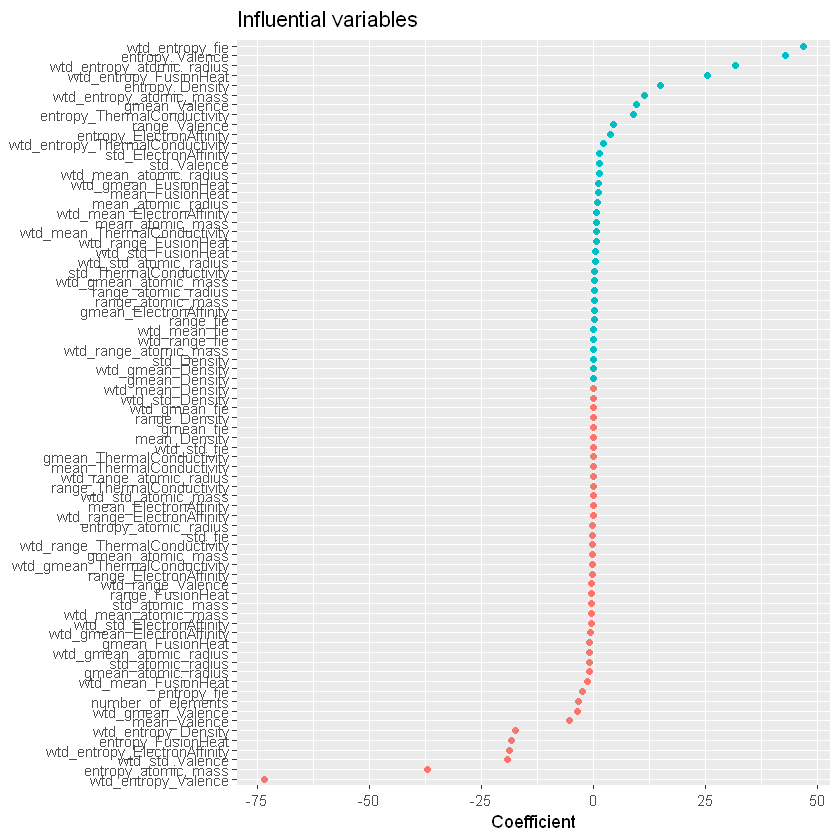

In [100]:
coef(model.lasso, s = "lambda.1se") %>%
  tidy() %>%
  filter(row != "(Intercept)") %>%
  ggplot(aes(value, reorder(row, value), color = value > 0)) +
  geom_point(show.legend = FALSE) +
  ggtitle("Influential variables") +
  xlab("Coefficient") +
  ylab(NULL)

From the above plot, we can see that unlike ridge, lasso actually pushes coefficients to zero and performs feature selection. This simplifies and automates the process of identifying those feature most influential to predictive accuracy.

In [101]:
#calculating MSE, RMSE and R2-Squared of lasso
mse_lasso<-mean((pred.lasso - test_df_lasso$critical_temp)^2)
print(mse_lasso)
rmse_lasso<-RMSE(pred.lasso, test_df_lasso$critical_temp)
print(rmse_lasso)
r2_lasso<-R2(pred.lasso, test_df_lasso$critical_temp)
print(r2_lasso)

[1] 320.973
[1] 17.91572
             1
[1,] 0.7259566


Comparing the MSE and R2-Squared of lasso and ridge models, we can say that lasso model holds the lowest MSE value and highest R2-Squared value which means that lasso model is better than ridge model.

At last, we build a model using Elastic Net. Elastic Net incorporates penalty from both L1 and L2 regularization. In addition to setting and choosing a lambda value, Elastic Net allows us to tune alpha parameter where alpha = 0 corresponds to ridge and alpha = 1 corresponds to lasso. Effectively this will shrink some coefficients and set some to 0 for sparse selection.

Performing Elastic Net requires us to tune parameters to identify the best alpha and lambda values and for this we need to use the caret package. We will tune the model by iterating over a number of alpha and lambda pairs and we can see which pair has the lowest associated error.

In [102]:
#setting a seed value to reproduce the results
set.seed(123)

#splitting in 70:30 ratio and building training and test sets
sample <- sample(c(TRUE, FALSE), nrow(sc_df), replace = T, prob = c(0.7,0.3))
train_df_net <- sc_df[sample, ]
test_df_net<- sc_df[!sample, ]

In [103]:
#fitting the model
#10 folds
model.net <- train(
    critical_temp ~., data = train_df_net, method = "glmnet",
    trControl = trainControl("cv", number = 10),
    tuneLength = 10)

print(model.net$bestTune)

   alpha     lambda
11   0.2 0.01141996


We can see that by tuning the parameters to specified values, we got alpha = 0.2 and lambda = 0.011 which has the lowest associated error.

In [104]:
#viewing the coefficients 
coef(model.net$finalModel, model.net$bestTune$lambda)

82 x 1 sparse Matrix of class "dgCMatrix"
                                            1
(Intercept)                     -1.909185e+01
number_of_elements              -3.125479e+00
mean_atomic_mass                 3.648495e-01
wtd_mean_atomic_mass            -2.149951e-01
gmean_atomic_mass               -8.589835e-02
wtd_gmean_atomic_mass            2.293870e-02
entropy_atomic_mass             -3.439512e+01
wtd_entropy_atomic_mass          1.591444e+01
range_atomic_mass                2.043048e-01
wtd_range_atomic_mass            8.893203e-03
std_atomic_mass                 -3.102853e-01
wtd_std_atomic_mass             -1.808090e-01
mean_fie                         6.632348e-03
wtd_mean_fie                     7.476639e-03
gmean_fie                       -4.022814e-03
wtd_gmean_fie                    8.477612e-03
entropy_fie                     -1.048235e+00
wtd_entropy_fie                  3.678739e+01
range_fie                        6.300089e-02
wtd_range_fie                    2.122

We can see that the coefficient for wtd_mean_Valence has been shrinked to 0. 

In [105]:
#predictions
x.test.net <- model.matrix(critical_temp ~., test_df_net)[,-1]
pred.net <- model.net %>% predict(x.test.net)
test_df_net$net_pred<-pred.net

In [106]:
head(test_df_net[,c(82,83)])

,critical_temp,net_pred
2,26,38.92069
4,22,29.61564
5,23,34.94994
8,33,23.61993
11,33,31.94625
16,27,48.51876


In [107]:
#calculating MSE, RMSE and R2-Squared of net
print(mean((pred.net - test_df_net$critical_temp)^2))
print(RMSE(pred.net, test_df_net$critical_temp))
print(R2(pred.net, test_df_net$critical_temp))

[1] 321.9993
[1] 17.94434
[1] 0.7250245


Combining the predictions and comparing the MSE's of lasso, ridge and elastic net models to select the best one,

In [109]:
head(cbind(test_df_ridge$critical_temp,test_df_ridge$ridge_pred,test_df_lasso$lasso_pred,test_df_net$net_pred))

,,1,1,
2,26,41.31134,40.10932,38.92069
4,22,37.98804,29.48639,29.61564
5,23,41.93135,34.99463,34.94994
8,33,34.21223,23.03800,23.61993
11,33,40.06206,31.67516,31.94625
16,27,44.06990,50.32161,48.51876


In [108]:
#displaying MSE's for lasso, ridge and elastic net model
print(mean((pred.ridge - test_df_ridge$critical_temp)^2))
print(mean((pred.lasso - test_df_lasso$critical_temp)^2))
print(mean((pred.net - test_df_net$critical_temp)^2))

[1] 364.0927
[1] 320.973
[1] 321.9993


So, from these 3 models, we can select Lasso Model as the best one amongst the embedded model building methods since it has the lowest mean squared error.

<u> Best Model Selected : Linear Model built using Lasso Regression (MSE : 320.97, No of variables : 76) </u>

#### Model Building using XGBoost

Further, we build an XGBoost model. XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework.
Optimized gradient boosting algorithm such as XGBoost provides parallel computation, handles tree-pruning, missing values and regularization to avoid overfitting/bias.

XGBoost is popular because of its speed and performance. The core algorithm is parallelizable and hence it can use all the processing power of our machine and the machines in our cluster.
thereby being 10 times faster than existing gradient boosting algorithms.

We start with dividing the data into training and test set in 70:30 ratio.

In [110]:
#setting a seed value to reproduce the results
set.seed(123)

#splitting in 70:30 ratio and building training and test sets
sc_df<-data.frame(read.csv('train.csv'))
sample <- sample(c(TRUE, FALSE), nrow(sc_df), replace = T, prob = c(0.7,0.3))
train_df_xg <- sc_df[sample, ]
test_df_xg<- sc_df[!sample, ]

By converting the training and testing sets into DMatrixes which is the recommended class in xgboost.

In [111]:
X_train = xgb.DMatrix(as.matrix(train_df_xg %>% select(-critical_temp)))
y_train = train_df_xg$critical_temp
X_test = xgb.DMatrix(as.matrix(test_df_xg %>% select(-critical_temp)))
y_test = test_df_xg$critical_temp

We specify cross-validation method, number of folds and also, enable parallel computation.

In [112]:
xgb_trcontrol = trainControl(
  method = "cv",
  number = 5,  
  allowParallel = TRUE,
  verboseIter = FALSE,
  returnData = FALSE
)

Further, we create a grid space to search for the best hyperparameters using which we train our model. The values which we specify is given in the below attached screenshots. 

* eta takes on a value between 0 and 1. Lower the eta, the model is more robust to overfitting. The default value is 0.3. 

* gamma specifies the minimum loss reduction required to make a further partition on a leaf node of the tree. Larger the gamma, the more conservative the algorithm is. The default value is set to 0. The range is from 0 to infinity.

* max_depth specifies the maximum depth of the tree. The default value is set to 6. The range is from 0 to inifinity.

* By setting min_child_weight, we are specifying the minimum sum of instance weights needed in a child node. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning. In linear regression mode, this simply corresponds to minimum number of instances needed to be in each node. The larger, the more conservative the algorithm will be. The range is 0 to ∞. The default value is set to 1.

* subsample : Using subsample, we specify the subsample ratio of the training instance. The default value is 1. Setting it to 0.5 means that XGBoost randomly collected half of the data instances to grow trees and this will prevent overfitting. The range is 0 to 1. 

* colsample_bytree : Using colsample_bytree, we specify the subsample ratio of columns when constructing each tree. The range is 0 to 1. The default value is set to 1. 

Since the grid search takes a lot of time to run, the screenshots are attached below:


<img src='Untitled.png'/>><br>
<img src='Untitled1.png'/><br>
<img src='Untitled2.png'/><br>

The grid search has taken the best parameters and has given an RMSE of 9.58 and R2-Squared of 0.92

Now, we are not using grid search, rather we let xgboost take the default values of hyperparameters.

In [113]:
set.seed(0) 
xgb_model = train(
  X_train, y_train,  
  trControl = xgb_trcontrol,
  #tuneGrid = xgbGrid,
  method = "xgbTree"
)

In [114]:
xgb_model$bestTune

,nrounds,max_depth,eta,gamma,colsample_bytree,min_child_weight,subsample
108,150,3,0.4,0,0.8,1,1


Calculating the root mean square error of test data,

In [117]:
predicted = predict(xgb_model, X_test)
residuals = y_test - predicted
rmse_xgb = sqrt(mean(residuals^2))
cat('The root mean square error of the test data is ', round(rmse_xgb,3),'\n')

The root mean square error of the test data is  10.841 


In [120]:
mse_xgb=mean(residuals^2)
print(mse_xgb)

[1] 117.5337


Compared to the linear models built before, this tree based XGBoost model has the lowest RMSE and a great R2-Squared which indicates that this is the best model amongst all.

In [121]:
data.frame(y_test, predicted)

y_test,predicted
26.0,30.86003
22.0,24.58834
23.0,19.05184
33.0,26.65568
33.0,24.59989
27.0,44.40737
14.8,17.94950
30.0,26.65568
18.2,24.59989
18.3,23.13086


Calculating the R-Squared of the test data,

In [122]:
y_test_mean = mean(y_test)
# Calculate total sum of squares
tss =  sum((y_test - y_test_mean)^2 )
# Calculate residual sum of squares
rss =  sum(residuals^2)
# Calculate R-squared
rsq_xgb  =  1 - (rss/tss)
cat('The R-square of the test data is ', round(rsq_xgb,3), '\n')

The R-square of the test data is  0.9 


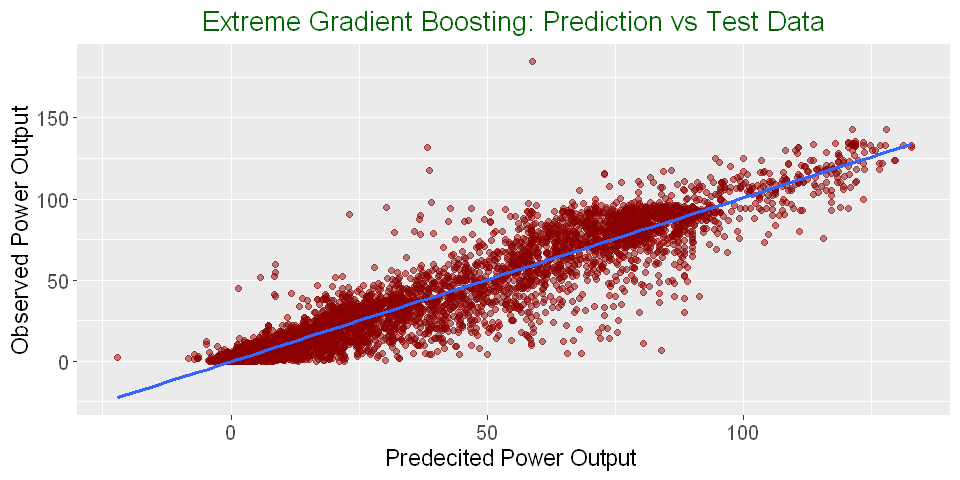

In [123]:
options(repr.plot.width=8, repr.plot.height=4)
my_data = as.data.frame(cbind(predicted = predicted,
                            observed = y_test))
# Plot predictions vs test data
ggplot(my_data,aes(predicted, observed)) + geom_point(color = "darkred", alpha = 0.5) + 
    geom_smooth(method=lm)+ ggtitle('Linear Regression ') + ggtitle("Extreme Gradient Boosting: Prediction vs Test Data") +
      xlab("Predecited Power Output ") + ylab("Observed Power Output") + 
        theme(plot.title = element_text(color="darkgreen",size=16,hjust = 0.5),
         axis.text.y = element_text(size=12), axis.text.x = element_text(size=12,hjust=.5),
         axis.title.x = element_text(size=14), axis.title.y = element_text(size=14))

### Best Model Selection

So, we have four models at the end which are as follows: 

* Multiple Linear Regression 
   Mean Squared Error (MSE) : 452.15

* Linear Model built using Stepwise Backward Regression 
  Mean Squared Error (MSE) : 319.88
  
* Linear Model built using Lasso Regression 
  Mean Squared Error (MSE) : 320.97
  
* XGBoost Model
  Mean Squared Error (MSE) : 117.5

The best model is selected as the one which has the lowest mean squared error (MSE). Lower the MSE, better the model gives accurate predictions. <br>
<b> So, the best model is XGBoost </b>

### Conclusion

Through this prediction task, we have demonstrated several linear regression models and evaluated the models on the test set to check the model performance and accuracy. Optimized Gradient boosting algorithms such as XGBoost is much better than regression based linear models when it comes to predicting with large number of features. 

### References

1. https://www.analyticsvidhya.com/blog/2016/01/xgboost-algorithm-easy-steps/

2. https://datascienceplus.com/how-to-apply-linear-regression-in-r/

3. https://afit-r.github.io/regularized_regression#why

4. https://afit-r.github.io/resampling_methods

5. https://afit-r.github.io/model_selection#stepwise